In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [2]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [3]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [4]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [6]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [7]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [8]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [9]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [10]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [11]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [12]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [13]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [14]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [15]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [16]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [17]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [18]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [19]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [20]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [21]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [22]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [23]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [24]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [25]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [26]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file<h1>

In [27]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
import numpy as np
import scipy.stats as stats
import collections
import math

In [28]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric, random_state = 0)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full', random_state = 0)
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [29]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric, random_state = 0)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full', random_state = 0)
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [30]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [31]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [32]:
def cluster_insight_studio_live(df_to_copy, labels):

    df = df_to_copy.copy()
    df['Labels'] = labels
    
    print("Dataset con le labels associate")
    ipd.display(df)
    
    cluster_dict = pd.DataFrame(columns = ["Studio_Recording", "Live_Recording"], \
                                index = ["Cluster {}".format(str(i)) for i in np.unique(df['Labels'])])
    
    tot_entropies = []
    dim_clusters = []
    max_cluster = 0
    
    for i in np.unique(df['Labels']):
        
        cluster_list = list(df[df['Labels'] == i].index)
                            
        print("Cluster {}\n".format(i), cluster_list)
        
        raw_elements = [elem.split("_")[1] for elem in cluster_list]
        counter = collections.Counter(raw_elements)
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Studio_Recording'] = counter['studio']
        cluster_dict.loc["Cluster {}".format(str(i)), 'Live_Recording'] = counter['live']
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = cluster_dict.loc["Cluster {}".format(str(i)), ['Studio_Recording', 'Live_Recording']].sum()
        
        lista = cluster_dict.loc['Cluster {}'.format(str(i)), ['Studio_Recording', 'Live_Recording']].values.tolist()
        tot = sum(lista)
        dim_clusters.append(tot)
        
        '''
        Entropia singola: -(sommatoria di (pij log2 pij) per tutte le classi all'interno di un cluster.
        --> pij = mij/mj dove mj è il numero di valori nel cluster j e mij è il numero di valori della classe i
        nel cluster j.
        '''
        entropy_single = -sum([(x/tot)*math.log2(x/tot) for x in lista if x != 0])
        cluster_dict.loc["Cluster {}".format(str(i)), 'Entropy'] = "%.4f" %(entropy_single)
        tot_entropies.append(entropy_single)
        
        
        '''
        Purity singola: etichetta della classe più frequente/numero di valori nel cluster
        '''
        purity_single = max(lista)/tot
        cluster_dict.loc["Cluster {}".format(str(i)), 'Purity'] = "%.4f" %(purity_single)

        max_cluster += max(lista)
        
        print()
        
    
    new_row = pd.Series(cluster_dict[['Studio_Recording', 'Live_Recording', 'Tot_Cluster']].sum(axis=0).astype(int), name = "Total")
    cluster_dict = cluster_dict.append(new_row, ignore_index=False)
    
    '''
    Entropia complessiva: sommatoria delle entropie di ogni cluster pesate per la dimensione di ogni cluster.
    --> (mj/m) * ej --> dove mj è la dimensione del cluster j e m è il numero totale di punti 
    (nel nostro caso 16). 
    '''
    
    last_tot = 16
    tot_entropy = 0

    for entropy, dim in zip(tot_entropies, dim_clusters):
        tot_entropy+=(entropy*(dim/last_tot))
        
    cluster_dict.loc["Total", 'Entropy'] = "%.4f" %(tot_entropy)
    
    '''
    Purity complessiva: sommatoria delle classi "corrette" (il valore più alto) di ogni cluster, divisa per il
    numero totale di valori (nel nostro caso 16).
    '''
    
    tot_purity = max_cluster/last_tot
    cluster_dict.loc["Total", 'Purity'] = "%.4f" %(tot_purity)
    
    
    
    cluster_dict['Tot_Cluster'] = cluster_dict['Tot_Cluster'].astype(int)
    
    
    ipd.display(cluster_dict)

In [33]:
def analyze_clusters(labels, X, df_to_copy, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [34]:
def analyze_approximated_clusters(labels, X, df, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = pd.DataFrame(np.squeeze(X), index = df.index)
    
    if together:
        
        cluster_insight_studio_live(df, labels)

        df['Labels'] = labels
    
    else:
        df['Labels'] = labels
        
        ipd.display(df)
        print()

        for i in np.unique(df['Labels']):
            print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
            print()
            
    
    print()
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.9)
    else:
        plt.subplots_adjust(hspace=1.3)
    plt.show()

In [35]:
def analyze_clusters_fb(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, color in zip(X[labels == i], colors):
            plt.plot(x, color = color, linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [36]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        #'med': np.median(values),
        #'10p': np.percentile(values, 10),
        #'25p': np.percentile(values, 25),
        #'50p': np.percentile(values, 50),
        #'75p': np.percentile(values, 75),
        #'90p': np.percentile(values, 90),
        #'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [37]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [38]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [39]:
def plot_centroids_approximated(centers, X, album_type, approximation_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " - " + approximation_type + " centroids\nApproximated Clustering")
    plt.show()

In [40]:
def plot_mean_values_approximated(labels, X, album_type, approximation_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \n{} - Approximated Clustering".format(album_type, \
                                                            approximation_type))
    
    plt.show()

<h2>Datasets Days</h2>

In [41]:
df_studio = pd.read_csv('df_day_studio.csv', index_col = 0)
df_live = pd.read_csv('df_day_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_day_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [42]:
album_type = "Studio_Recording_day"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [43]:
df_studio

1   2    3   4   5   6    7   8   9  10  ...  357  358  \
track_date_created                                            ...             
2009_studio          0   2    0   0   0   1    0   0  33   0  ...    8    0   
2010_studio         10  21   13  13   4  19   41  34  62  10  ...   55   63   
2011_studio         12  23   85  77  51  29   58  10  35  54  ...  110   21   
2012_studio          9  67   50  46  14   0    5   9  29  77  ...   47   10   
2013_studio         28  33  188  61   6  10  117  85  91  89  ...   16    9   
2014_studio          9  41   57  17  35  40   46  31  13  63  ...   11   25   
2015_studio         50  38   29  33  21   7   32   4  36  22  ...   30   12   
2016_studio         41   6   22  68  99  48   41  73  81  24  ...   53   48   

                    359  360  361  362  363  364  365  366  
track_date_created                                          
2009_studio          20    5    2   78   25    3    3    0  
2010_studio           1   23    1   26   51   65    3    0  
2011_studio           0    2    9   27   38   20    2    0  
2012_studio          20   40   22   55   42   15   41   21  
2013_studio           0    6    6    7    0   80   42    0  
2014_studio          12    0   17   23   12   17   24    0  
2015_studio           8    2    1   15   10   30   44    0  
2016_studio          11   47    4   42   31   21   86  176  

[8 rows x 366 columns]

In [44]:
df_studio.shape

(8, 366)

In [45]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[  0.],
        [  2.],
        [  0.],
        ...,
        [  3.],
        [  3.],
        [  0.]],

       [[ 10.],
        [ 21.],
        [ 13.],
        ...,
        [ 65.],
        [  3.],
        [  0.]],

       [[ 12.],
        [ 23.],
        [ 85.],
        ...,
        [ 20.],
        [  2.],
        [  0.]],

       ...,

       [[  9.],
        [ 41.],
        [ 57.],
        ...,
        [ 17.],
        [ 24.],
        [  0.]],

       [[ 50.],
        [ 38.],
        [ 29.],
        ...,
        [ 30.],
        [ 44.],
        [  0.]],

       [[ 41.],
        [  6.],
        [ 22.],
        ...,
        [ 21.],
        [ 86.],
        [176.]]])

In [46]:
tss_studio.shape

(8, 366, 1)

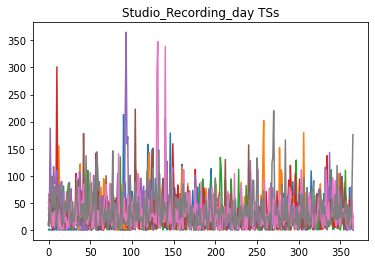

In [47]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [48]:
tss_studio_scaled = TimeSeriesScalerMinMax().fit_transform(tss_studio)
tss_studio_scaled

array([[[0.        ],
        [0.00938967],
        [0.        ],
        ...,
        [0.01408451],
        [0.01408451],
        [0.        ]],

       [[0.04950495],
        [0.1039604 ],
        [0.06435644],
        ...,
        [0.32178218],
        [0.01485149],
        [0.        ]],

       [[0.08888889],
        [0.17037037],
        [0.62962963],
        ...,
        [0.14814815],
        [0.01481481],
        [0.        ]],

       ...,

       [[0.04035874],
        [0.1838565 ],
        [0.25560538],
        ...,
        [0.07623318],
        [0.10762332],
        [0.        ]],

       [[0.14367816],
        [0.1091954 ],
        [0.08333333],
        ...,
        [0.0862069 ],
        [0.12643678],
        [0.        ]],

       [[0.18636364],
        [0.02727273],
        [0.1       ],
        ...,
        [0.09545455],
        [0.39090909],
        [0.8       ]]])

In [49]:
tss_studio_scaled.shape

(8, 366, 1)

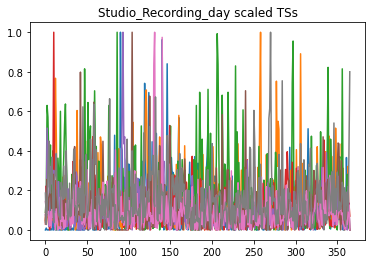

In [50]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [52]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   

                         357       358       359       360       361  \
track_date_created                                                     
2009_studio         0.037559  0.000000  0.093897  0.023474  0.009390   
2010_studio         0.272277  0.311881  0.004950  0.113861  0.004950   
2011_studio         0.814815  0.155556  0.000000  0.014815  0.066667   
2012_studio         0.156146  0.033223  0.066445  0.132890  0.073090   
2013_studio         0.043836  0.024658  0.000000  0.016438  0.016438   
2014_studio         0.049327  0.112108  0.053812  0.000000  0.076233   
2015_studio         0.086207  0.034483  0.022989  0.005747  0.002874   
2016_studio         0.240909  0.218182  0.050000  0.213636  0.018182   

                         362       363       364       365       366  
track_date_created                                                    
2009_studio         0.366197  0.117371  0.014085  0.014085  0.000000  
2010_studio         0.128713  0.252475  0.321782  0.014851  0.000000  
2011_studio         0.200000  0.281481  0.148148  0.014815  0.000000  
2012_studio         0.182724  0.139535  0.049834  0.136213  0.069767  
2013_studio         0.019178  0.000000  0.219178  0.115068  0.000000  
2014_studio         0.103139  0.053812  0.076233  0.107623  0.000000  
2015_studio         0.043103  0.028736  0.086207  0.126437  0.000000  
2016_studio         0.190909  0.140909  0.095455  0.390909  0.800000  

[8 rows x 366 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  4.55031811137542 Silhouette Score:  0.22611152789429428

k:  3 SSE:  3.4830644332485434 Silhouette Score:  0.10117645771706041

k:  4 SSE:  2.3794662420805173 Silhouette Score:  0.11564103292745531

k:  5 SSE:  1.5370056987954754 Silhouette Score:  0.07876032054464605

k:  6 SSE:  0.8822430457363056 Silhouette Score:  0.05008702820853157

k:  7 SSE:  0.3368217350634514 Silhouette Score:  0.04332377632185726



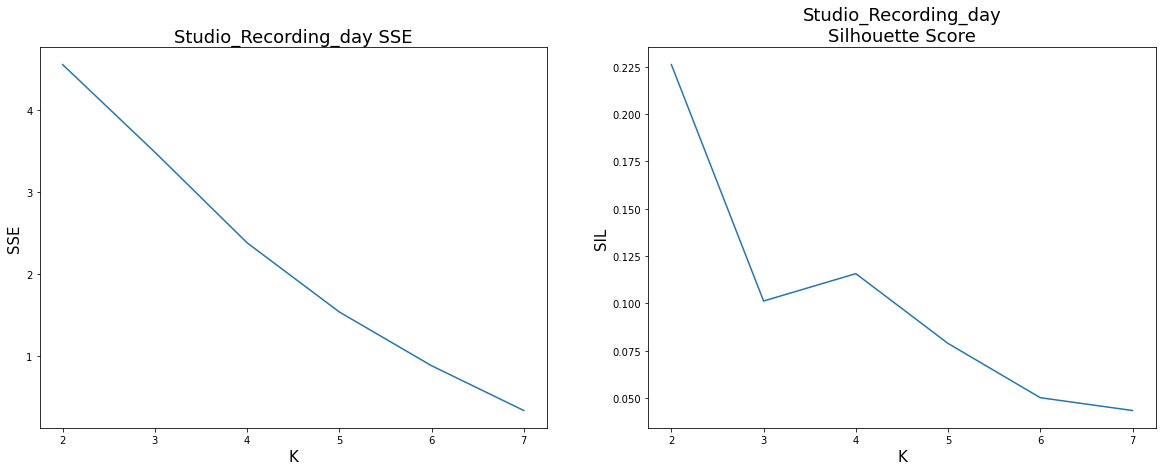

In [53]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 4**

In [54]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(4, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (4, 366, 1)

Labels:  {0: 5, 1: 1, 2: 1, 3: 1}

SSE:  2.3794662420805173
Silhouette Score:  0.11564103292745531


In [55]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio         0.000000  0.093897  0.023474  0.009390  0.366197   
2010_studio         0.311881  0.004950  0.113861  0.004950  0.128713   
2011_studio         0.155556  0.000000  0.014815  0.066667  0.200000   
2012_studio         0.033223  0.066445  0.132890  0.073090  0.182724   
2013_studio         0.024658  0.000000  0.016438  0.016438  0.019178   
2014_studio         0.112108  0.053812  0.000000  0.076233  0.103139   
2015_studio         0.034483  0.022989  0.005747  0.002874  0.043103   
2016_studio         0.218182  0.050000  0.213636  0.018182  0.190909   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_studio         0.117371  0.014085  0.014085  0.000000       0  
2010_studio         0.252475  0.321782  0.014851  0.000000       3  
2011_studio         0.281481  0.148148  0.014815  0.000000       2  
2012_studio         0.139535  0.049834  0.136213  0.069767       0  
2013_studio         0.000000  0.219178  0.115068  0.000000       0  
2014_studio         0.053812  0.076233  0.107623  0.000000       0  
2015_studio         0.028736  0.086207  0.126437  0.000000       0  
2016_studio         0.140909  0.095455  0.390909  0.800000       1  

[8 rows x 367 columns]

Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 1
 ['2016_studio']

Cluster 2
 ['2011_studio']

Cluster 3
 ['2010_studio']



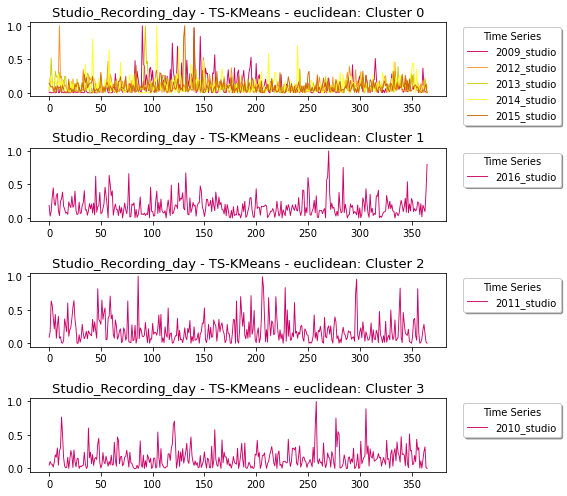

In [56]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

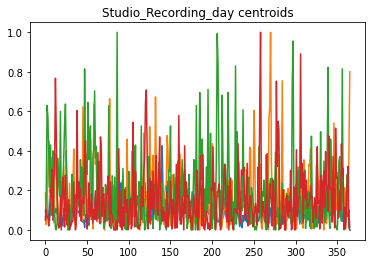

In [57]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  1.4308678561247672 Silhouette Score:  0.20629921480326868

k:  3 SSE:  0.9823526451001695 Silhouette Score:  0.16981438287590564

k:  4 SSE:  0.7583632883732423 Silhouette Score:  0.08379437375582682

k:  5 SSE:  0.465317246351611 Silhouette Score:  0.06795694156151058

k:  6 SSE:  0.2518520966372773 Silhouette Score:  0.037960189457694915

k:  7 SSE:  0.10364527246038292 Silhouette Score:  0.027479471052916996



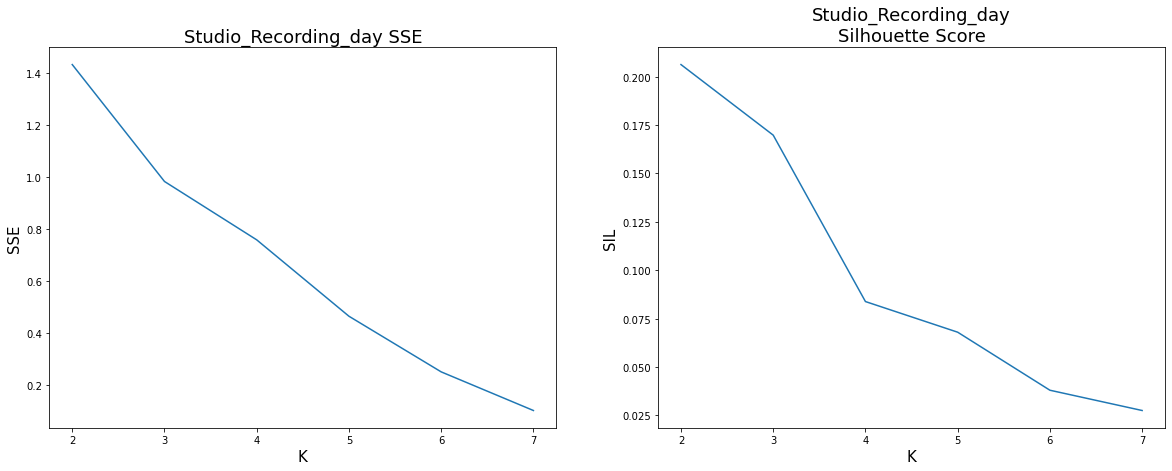

In [58]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 3**

In [59]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(3, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 5, 1: 1, 2: 2}

SSE:  0.9823526451001695
Silhouette Score:  0.16981438287590564


In [61]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio         0.000000  0.093897  0.023474  0.009390  0.366197   
2010_studio         0.311881  0.004950  0.113861  0.004950  0.128713   
2011_studio         0.155556  0.000000  0.014815  0.066667  0.200000   
2012_studio         0.033223  0.066445  0.132890  0.073090  0.182724   
2013_studio         0.024658  0.000000  0.016438  0.016438  0.019178   
2014_studio         0.112108  0.053812  0.000000  0.076233  0.103139   
2015_studio         0.034483  0.022989  0.005747  0.002874  0.043103   
2016_studio         0.218182  0.050000  0.213636  0.018182  0.190909   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_studio         0.117371  0.014085  0.014085  0.000000       0  
2010_studio         0.252475  0.321782  0.014851  0.000000       2  
2011_studio         0.281481  0.148148  0.014815  0.000000       1  
2012_studio         0.139535  0.049834  0.136213  0.069767       0  
2013_studio         0.000000  0.219178  0.115068  0.000000       0  
2014_studio         0.053812  0.076233  0.107623  0.000000       0  
2015_studio         0.028736  0.086207  0.126437  0.000000       0  
2016_studio         0.140909  0.095455  0.390909  0.800000       2  

[8 rows x 367 columns]

Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 1
 ['2011_studio']

Cluster 2
 ['2010_studio', '2016_studio']



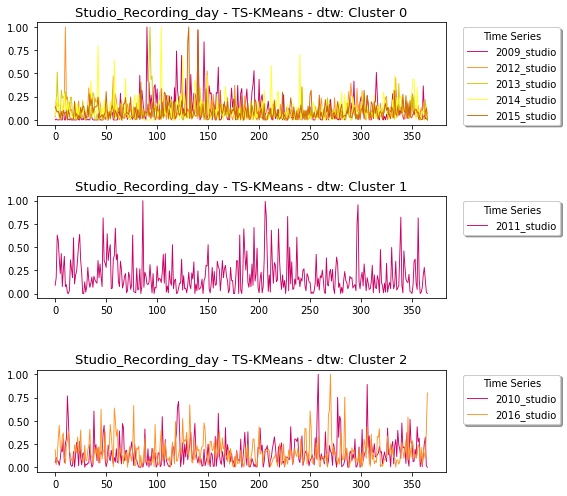

In [62]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

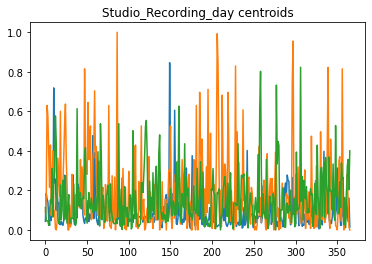

In [63]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  36.402544891003345 Silhouette Score:  0.22611152789429426
Calinski-Harabaz:  2.380477022404735 Davies-Bouldin:  0.5547523634145113

k:  3 SSE:  27.864515465988344 Silhouette Score:  0.1011764577170602
Calinski-Harabaz:  2.06181583629309 Davies-Bouldin:  0.6202438072507767

k:  4 SSE:  19.035729936644127 Silhouette Score:  0.11564103292745558
Calinski-Harabaz:  2.228047665351948 Davies-Bouldin:  0.5600101199989165

k:  5 SSE:  12.296045590363805 Silhouette Score:  0.07876032054464593
Calinski-Harabaz:  2.3513089612239737 Davies-Bouldin:  0.536474065523713

k:  6 SSE:  7.0579443658904495 Silhouette Score:  0.050087028208531545
Calinski-Harabaz:  2.481582088692874 Davies-Bouldin:  0.4911616356778215

k:  7 SSE:  2.6945738805076127 Silhouette Score:  0.04332377632185727
Calinski-Harabaz:  2.978240928133529 Davies-Bouldin:  0.3759276840880145



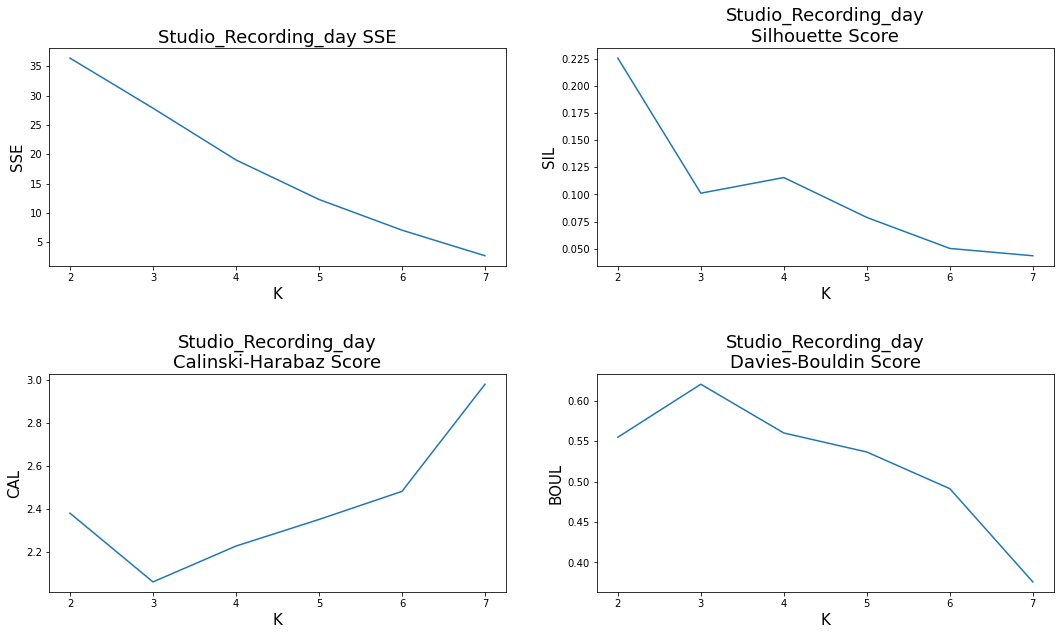

In [64]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [65]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(4, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (4, 366)

Labels:  {0: 5, 1: 1, 2: 1, 3: 1}

SSE:  19.035729936644127
Silhouette Score:  0.11564103292745558
Calinski - Harabaz Score:  2.228047665351948
Davies - Bouldin Score:  0.5600101199989165


In [66]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio         0.000000  0.093897  0.023474  0.009390  0.366197   
2010_studio         0.311881  0.004950  0.113861  0.004950  0.128713   
2011_studio         0.155556  0.000000  0.014815  0.066667  0.200000   
2012_studio         0.033223  0.066445  0.132890  0.073090  0.182724   
2013_studio         0.024658  0.000000  0.016438  0.016438  0.019178   
2014_studio         0.112108  0.053812  0.000000  0.076233  0.103139   
2015_studio         0.034483  0.022989  0.005747  0.002874  0.043103   
2016_studio         0.218182  0.050000  0.213636  0.018182  0.190909   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_studio         0.117371  0.014085  0.014085  0.000000       0  
2010_studio         0.252475  0.321782  0.014851  0.000000       3  
2011_studio         0.281481  0.148148  0.014815  0.000000       2  
2012_studio         0.139535  0.049834  0.136213  0.069767       0  
2013_studio         0.000000  0.219178  0.115068  0.000000       0  
2014_studio         0.053812  0.076233  0.107623  0.000000       0  
2015_studio         0.028736  0.086207  0.126437  0.000000       0  
2016_studio         0.140909  0.095455  0.390909  0.800000       1  

[8 rows x 367 columns]

Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 1
 ['2016_studio']

Cluster 2
 ['2011_studio']

Cluster 3
 ['2010_studio']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [67]:
F = [list(calculate_features(x).values())for x in tss_studio_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  94.10646209580592 Silhouette Score:  0.7278458869333349
Calinski-Harabaz:  38.06640809999251 Davies-Bouldin:  0.3699015672590126

k:  3 SSE:  47.177703218333384 Silhouette Score:  0.716651604198009
Calinski-Harabaz:  34.125120560736526 Davies-Bouldin:  0.2968127947804299

k:  4 SSE:  3.501474948791934 Silhouette Score:  0.728496402137639
Calinski-Harabaz:  261.85313803201814 Davies-Bouldin:  0.16139951845477032

k:  5 SSE:  1.4699532008127982 Silhouette Score:  0.6439021234634996
Calinski-Harabaz:  351.89164883508255 Davies-Bouldin:  0.11374999182291076

k:  6 SSE:  0.03188865665315267 Silhouette Score:  0.47031999782483735
Calinski-Harabaz:  8669.211075532241 Davies-Bouldin:  0.024734925283892307

k:  7 SSE:  0.013747831719825583 Silhouette Score:  0.22620298672010614
Calinski-Harabaz:  8378.798605160355 Davies-Bouldin:  0.01969851521802595



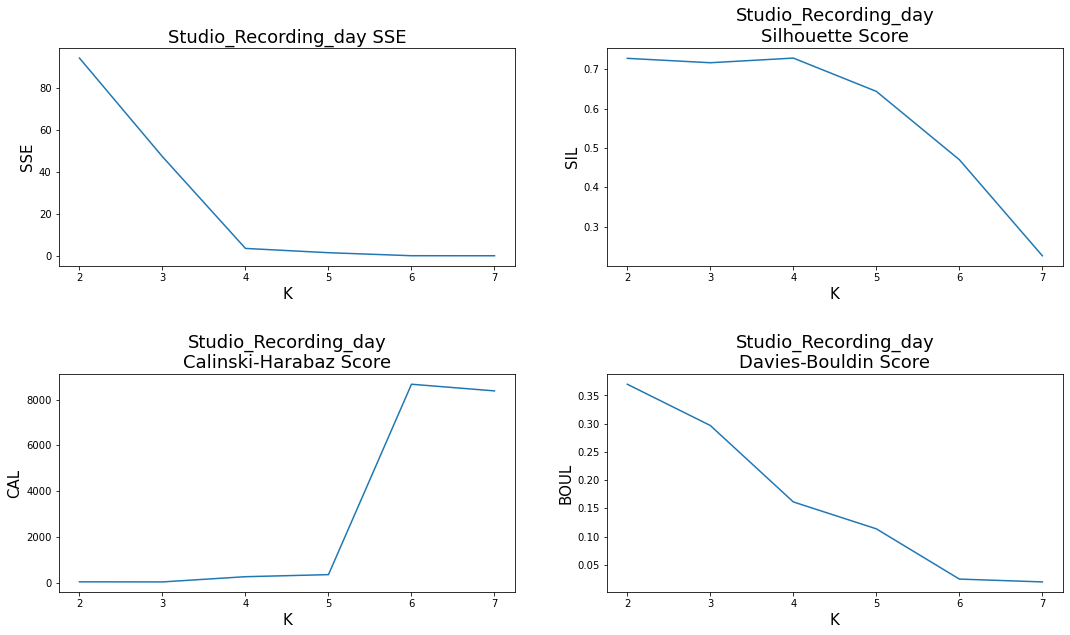

In [68]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [69]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(4, 300, 10, "", F, True)

cluster_centers_shape (4, 5)

Labels:  {0: 2, 1: 3, 2: 1, 3: 2}

SSE:  3.501474948791934
Silhouette Score:  0.728496402137639
Calinski - Harabaz Score:  261.85313803201814
Davies - Bouldin Score:  0.16139951845477032


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

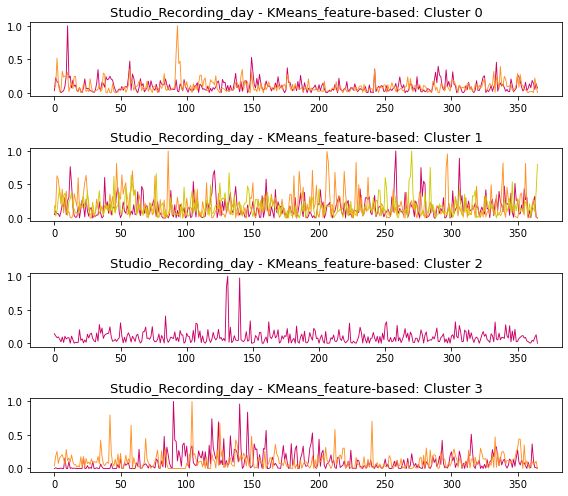

In [70]:
analyze_clusters_fb(labels_studio_fb, tss_studio_scaled, album_type, 'KMeans_feature-based', False)

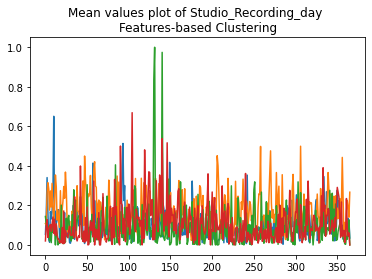

In [71]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [72]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [73]:
print(tss_studio_scaled.shape, M.shape)

(8, 366, 1) (8, 8)


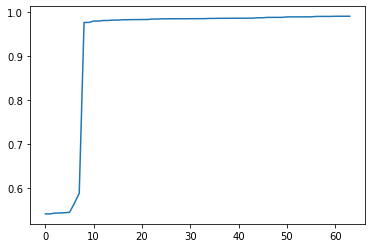

In [74]:
plt.plot(sorted(M.ravel()))
plt.show()

In [75]:
dbscan_compression_studio = DBSCAN(eps=0.98, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.98, metric='precomputed')

In [76]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [77]:
n_paa_segments = 183
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)

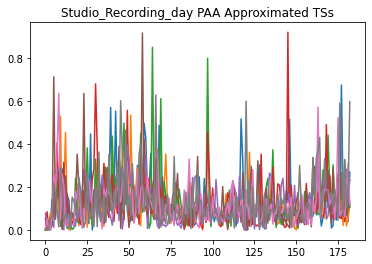

In [78]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  1.4180662514498583 Silhouette Score:  0.24045981968826607

k:  3 SSE:  0.9964513561216778 Silhouette Score:  0.1383148704648038

k:  4 SSE:  0.7240642387814559 Silhouette Score:  0.12083779867420358

k:  5 SSE:  0.4611749141174125 Silhouette Score:  0.08408718601922004

k:  6 SSE:  0.27738267949606965 Silhouette Score:  0.03802579245569696

k:  7 SSE:  0.1109244509336973 Silhouette Score:  0.039844913441655645



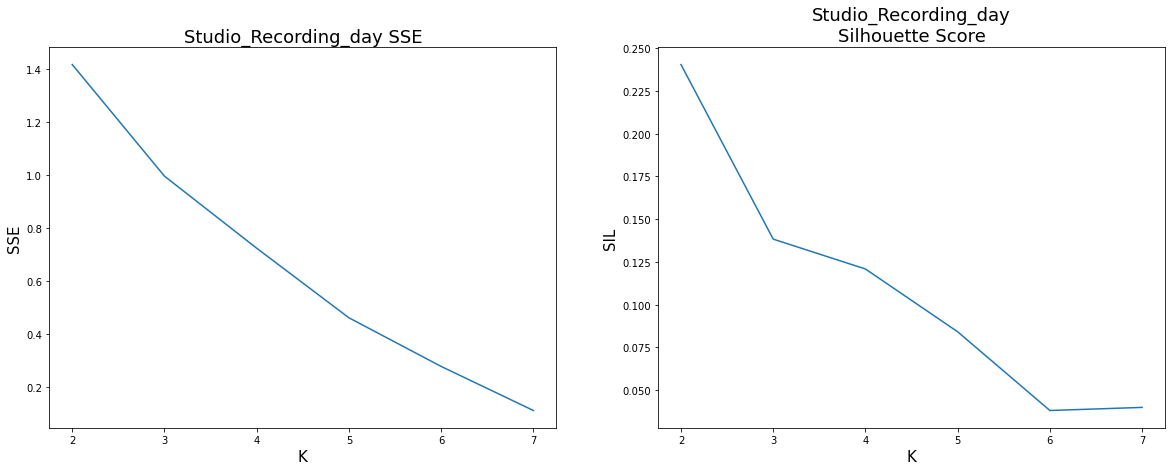

In [79]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [80]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  0.9964513561216778
Silhouette Score:  0.1383148704648038


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.004695  0.000000  0.002347  0.000000  0.077465   
2010_studio         0.076733  0.064356  0.056931  0.185644  0.178218   
2011_studio         0.129630  0.600000  0.296296  0.251852  0.329630   
2012_studio         0.126246  0.159468  0.023256  0.023256  0.176080   
2013_studio         0.083562  0.341096  0.021918  0.276712  0.246575   
2014_studio         0.112108  0.165919  0.168161  0.172646  0.170404   
2015_studio         0.126437  0.089080  0.040230  0.051724  0.083333   
2016_studio         0.106818  0.204545  0.334091  0.259091  0.238636   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.051643  0.004695  0.002347  0.000000  0.000000  ...   
2010_studio         0.282178  0.633663  0.099010  0.012376  0.084158  ...   
2011_studio         0.085185  0.003704  0.200000  0.218519  0.351852  ...   
2012_studio         0.609635  0.161130  0.142857  0.073090  0.049834  ...   
2013_studio         0.158904  0.116438  0.152055  0.138356  0.047945  ...   
2014_studio         0.136771  0.150224  0.078475  0.040359  0.031390  ...   
2015_studio         0.081897  0.053161  0.025862  0.011494  0.106322  ...   
2016_studio         0.140909  0.336364  0.154545  0.077273  0.147727  ...   

                         174       175       176       177       178  \
track_date_created                                                     
2009_studio         0.098592  0.185446  0.086854  0.079812  0.018779   
2010_studio         0.388614  0.163366  0.128713  0.267327  0.292079   
2011_studio         0.018519  0.048148  0.359259  0.077778  0.485185   
2012_studio         0.056478  0.252492  0.131229  0.039867  0.094684   
2013_studio         0.090411  0.184932  0.197260  0.082192  0.034247   
2014_studio         0.195067  0.372197  0.291480  0.174888  0.080717   
2015_studio         0.114943  0.048851  0.097701  0.096264  0.060345   
2016_studio         0.156818  0.268182  0.118182  0.118182  0.229545   

                         179       180       181       182  Labels  
track_date_created                                                  
2009_studio         0.058685  0.187793  0.065728  0.007042       0  
2010_studio         0.059406  0.066832  0.287129  0.007426       1  
2011_studio         0.007407  0.133333  0.214815  0.007407       2  
2012_studio         0.099668  0.127907  0.094684  0.102990       0  
2013_studio         0.008219  0.017808  0.109589  0.057534       0  
2014_studio         0.026906  0.089686  0.065022  0.053812       0  
2015_studio         0.014368  0.022989  0.057471  0.063218       0  
2016_studio         0.131818  0.104545  0.118182  0.595455       1  

[8 rows x 184 columns]


Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 1
 ['2010_studio', '2016_studio']

Cluster 2
 ['2011_studio']




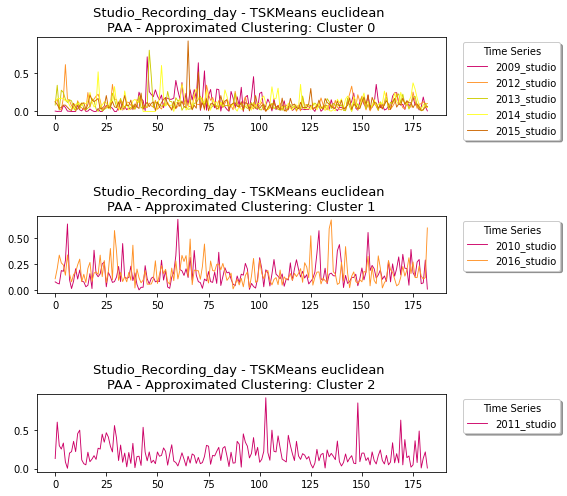

In [81]:
analyze_approximated_clusters(labels_studio_paa, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

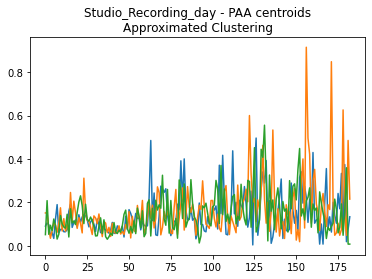

In [82]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type, 'PAA')

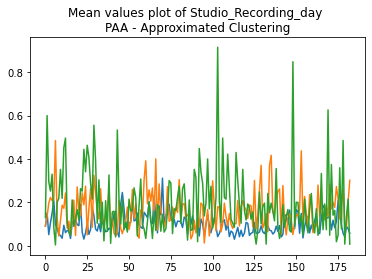

In [83]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.4770881750288757 Silhouette Score:  0.23108640373376071

k:  3 SSE:  0.33760009315982087 Silhouette Score:  0.16375334676619607

k:  4 SSE:  0.2338374074875353 Silhouette Score:  0.12720375571597387

k:  5 SSE:  0.145746908377261 Silhouette Score:  0.09983037767959993

k:  6 SSE:  0.07222535624365034 Silhouette Score:  0.05495127495653602

k:  7 SSE:  0.03456834986785141 Silhouette Score:  0.0348543173851762



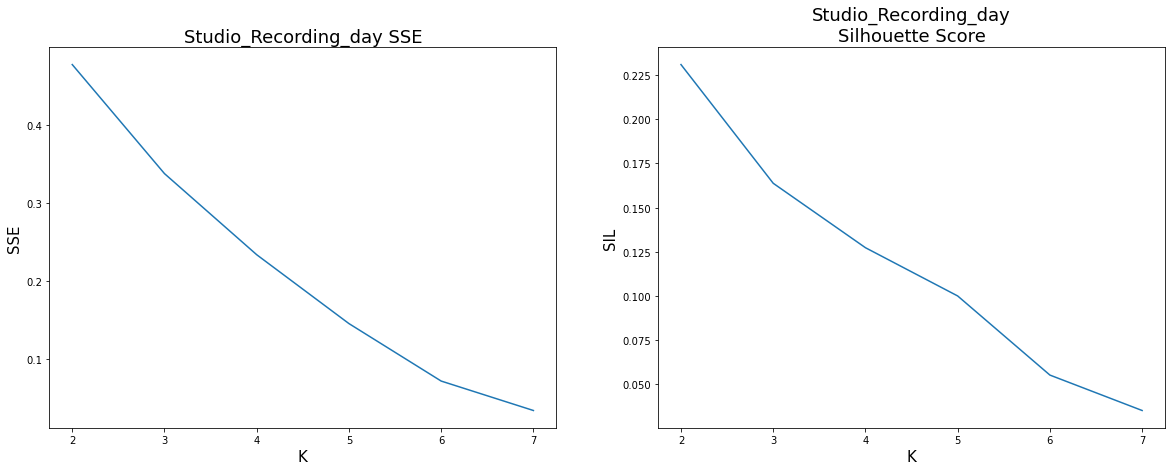

In [84]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [85]:
cluster_centers_studio_paa_dtw, dict_label_studio_paa_dtw, \
labels_studio_paa_dtw = run_kmeans(3, 300, 10, 'dtw', X_paa, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  0.33760009315982087
Silhouette Score:  0.16375334676619607


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.004695  0.000000  0.002347  0.000000  0.077465   
2010_studio         0.076733  0.064356  0.056931  0.185644  0.178218   
2011_studio         0.129630  0.600000  0.296296  0.251852  0.329630   
2012_studio         0.126246  0.159468  0.023256  0.023256  0.176080   
2013_studio         0.083562  0.341096  0.021918  0.276712  0.246575   
2014_studio         0.112108  0.165919  0.168161  0.172646  0.170404   
2015_studio         0.126437  0.089080  0.040230  0.051724  0.083333   
2016_studio         0.106818  0.204545  0.334091  0.259091  0.238636   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.051643  0.004695  0.002347  0.000000  0.000000  ...   
2010_studio         0.282178  0.633663  0.099010  0.012376  0.084158  ...   
2011_studio         0.085185  0.003704  0.200000  0.218519  0.351852  ...   
2012_studio         0.609635  0.161130  0.142857  0.073090  0.049834  ...   
2013_studio         0.158904  0.116438  0.152055  0.138356  0.047945  ...   
2014_studio         0.136771  0.150224  0.078475  0.040359  0.031390  ...   
2015_studio         0.081897  0.053161  0.025862  0.011494  0.106322  ...   
2016_studio         0.140909  0.336364  0.154545  0.077273  0.147727  ...   

                         174       175       176       177       178  \
track_date_created                                                     
2009_studio         0.098592  0.185446  0.086854  0.079812  0.018779   
2010_studio         0.388614  0.163366  0.128713  0.267327  0.292079   
2011_studio         0.018519  0.048148  0.359259  0.077778  0.485185   
2012_studio         0.056478  0.252492  0.131229  0.039867  0.094684   
2013_studio         0.090411  0.184932  0.197260  0.082192  0.034247   
2014_studio         0.195067  0.372197  0.291480  0.174888  0.080717   
2015_studio         0.114943  0.048851  0.097701  0.096264  0.060345   
2016_studio         0.156818  0.268182  0.118182  0.118182  0.229545   

                         179       180       181       182  Labels  
track_date_created                                                  
2009_studio         0.058685  0.187793  0.065728  0.007042       1  
2010_studio         0.059406  0.066832  0.287129  0.007426       0  
2011_studio         0.007407  0.133333  0.214815  0.007407       2  
2012_studio         0.099668  0.127907  0.094684  0.102990       1  
2013_studio         0.008219  0.017808  0.109589  0.057534       1  
2014_studio         0.026906  0.089686  0.065022  0.053812       1  
2015_studio         0.014368  0.022989  0.057471  0.063218       1  
2016_studio         0.131818  0.104545  0.118182  0.595455       0  

[8 rows x 184 columns]


Cluster 0
 ['2010_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 2
 ['2011_studio']




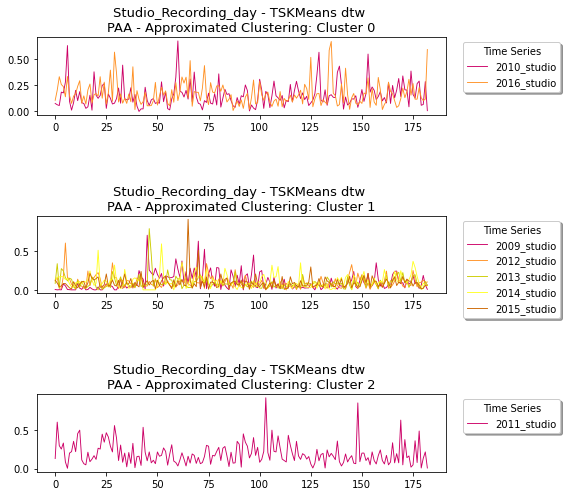

In [86]:
analyze_approximated_clusters(labels_studio_paa_dtw, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

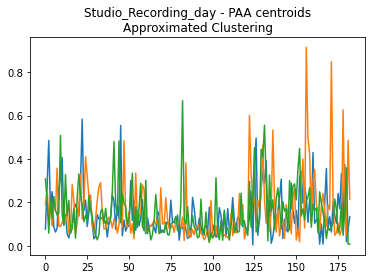

In [87]:
plot_centroids_approximated(cluster_centers_studio_paa_dtw, X_paa, album_type, 'PAA')

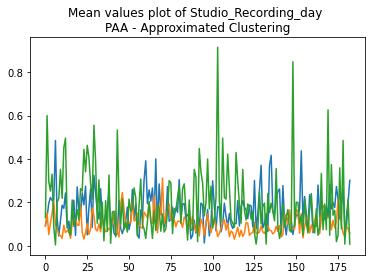

In [88]:
plot_mean_values_approximated(labels_studio_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [89]:
n_sax1d_segments = 183
n_sax_symbols_avg = 50
#n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg)

X_sax1d = one_d_sax.fit_transform(tss_studio_scaled)
X_sax1d.shape

(8, 183, 2)

<h3>Euclidean</h3>

k:  2 SSE:  764.4999999999992 Silhouette Score:  0.19068745463432046

k:  3 SSE:  552.9625000000004 Silhouette Score:  0.1188123870986507

k:  4 SSE:  402.4000000000004 Silhouette Score:  0.10786752312748475

k:  5 SSE:  268.40625 Silhouette Score:  0.06346370665909914

k:  6 SSE:  166.33333333333297 Silhouette Score:  0.02602500085319446

k:  7 SSE:  70.25000000000001 Silhouette Score:  0.028580295800343332



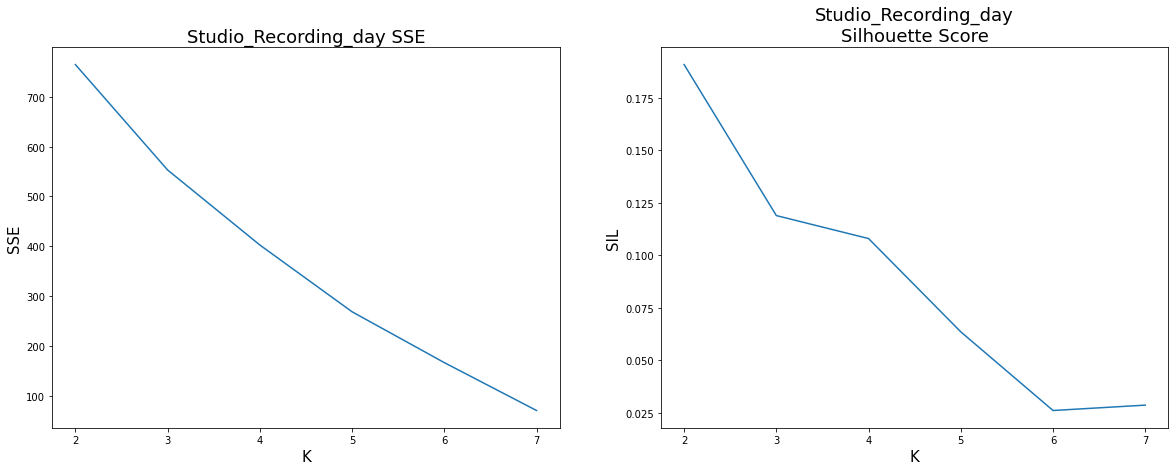

In [90]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [91]:
cluster_centers_studio_sax1d, dict_label_studio_sax1d, \
labels_studio_sax1d = run_kmeans(3, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (3, 183, 2)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  552.9625000000004
Silhouette Score:  0.1188123870986507


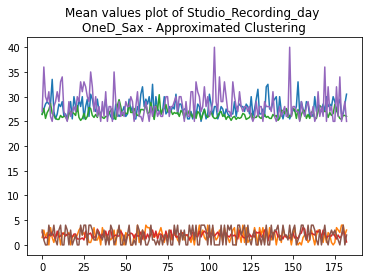

In [92]:
plot_mean_values_approximated(labels_studio_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  421.68898010202355 Silhouette Score:  0.159217319055187

k:  3 SSE:  310.5507017288269 Silhouette Score:  0.13624910003798904

k:  4 SSE:  228.8298611111111 Silhouette Score:  0.05187013268505799

k:  5 SSE:  145.44304874505104 Silhouette Score:  0.03006602528543328

k:  6 SSE:  80.96626984126983 Silhouette Score:  0.03286534869037982

k:  7 SSE:  32.59315476190475 Silhouette Score:  0.027496977242216124



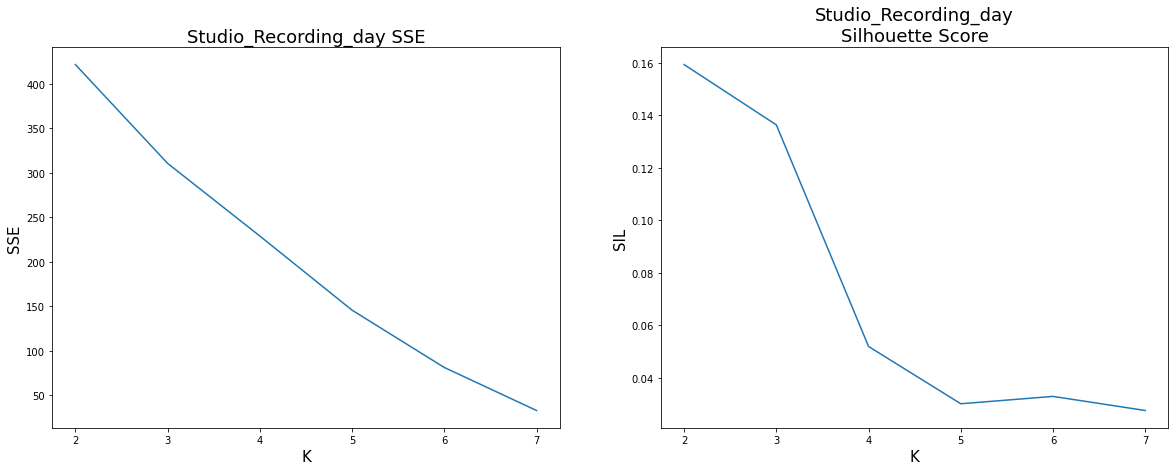

In [93]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [94]:
cluster_centers_studio_sax1d_dtw, dict_label_studio_sax1d_dtw, \
labels_studio_sax1d_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (3, 183, 2)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  310.5507017288269
Silhouette Score:  0.13624910003798904


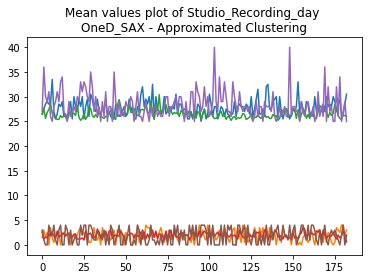

In [96]:
plot_mean_values_approximated(labels_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [97]:
n_sax_segments = 183
n_sax_symbols = 50

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_scaled)

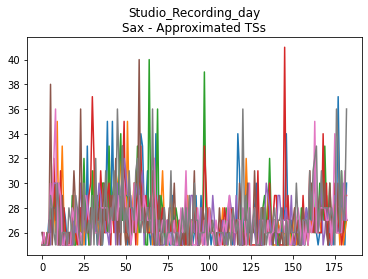

In [98]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  515.4999999999998 Silhouette Score:  0.23282120224042002

k:  3 SSE:  358.2375000000005 Silhouette Score:  0.14559557333830458

k:  4 SSE:  258.3000000000005 Silhouette Score:  0.12761070005300426

k:  5 SSE:  165.46875 Silhouette Score:  0.08181778905260349

k:  6 SSE:  99.18750000000001 Silhouette Score:  0.039158362037614865

k:  7 SSE:  40.06250000000001 Silhouette Score:  0.04008867260964732



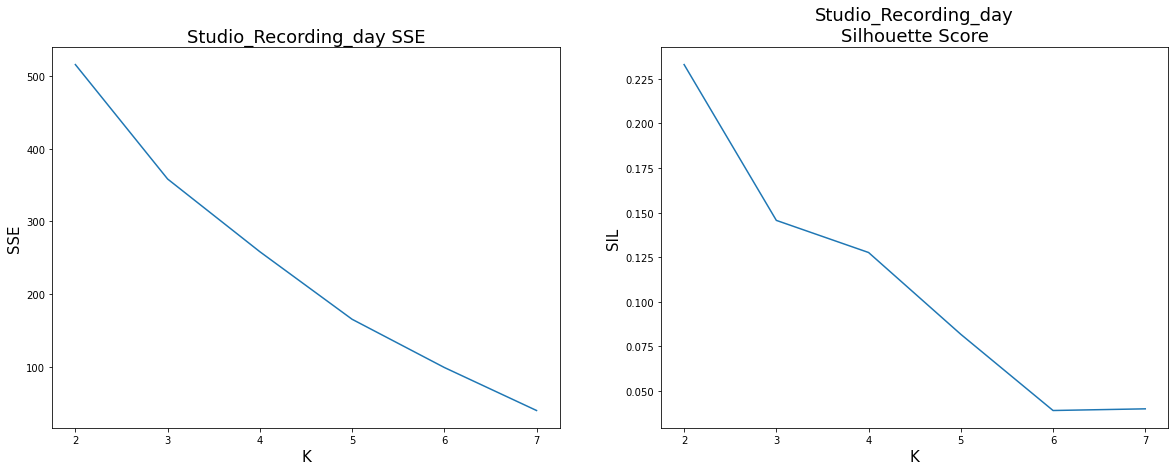

In [99]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [100]:
cluster_centers_studio_sax, dict_label_studio_sax, \
labels_studio_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  358.2375000000005
Silhouette Score:  0.14559557333830458


0   1   2   3   4   5   6   7   8   9  ...  174  175  \
track_date_created                                          ...             
2009_studio         25  25  25  25  26  26  25  25  25  25  ...   26   28   
2010_studio         26  26  26  28  28  30  36  26  25  26  ...   32   28   
2011_studio         27  36  30  29  31  26  25  28  29  31  ...   25   25   
2012_studio         27  28  25  25  28  36  28  27  26  25  ...   26   29   
2013_studio         26  31  25  30  29  28  27  28  27  25  ...   26   28   
2014_studio         27  28  28  28  28  27  27  26  25  25  ...   28   32   
2015_studio         27  26  25  26  26  26  26  25  25  27  ...   27   25   
2016_studio         27  29  31  30  29  27  31  28  26  27  ...   28   30   

                    176  177  178  179  180  181  182  Labels  
track_date_created                                             
2009_studio          26   26   25   26   28   26   25       0  
2010_studio          27   30   30   26   26   30   25       1  
2011_studio          32   26   34   25   27   29   25       2  
2012_studio          27   25   26   26   27   26   27       0  
2013_studio          28   26   25   25   25   27   26       0  
2014_studio          30   28   26   25   26   26   26       0  
2015_studio          26   26   26   25   25   26   26       0  
2016_studio          27   27   29   27   27   27   36       1  

[8 rows x 184 columns]


Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 1
 ['2010_studio', '2016_studio']

Cluster 2
 ['2011_studio']




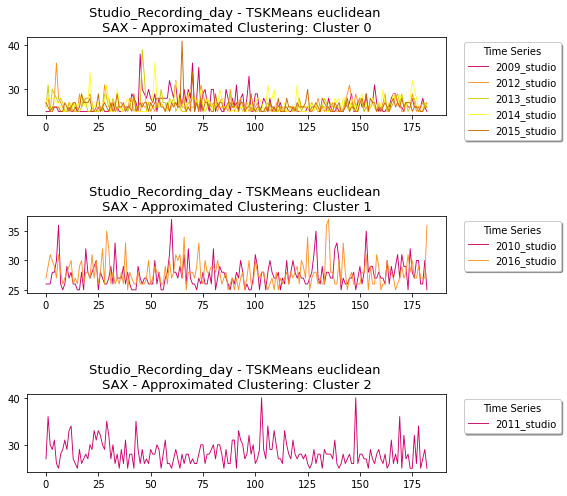

In [101]:
analyze_approximated_clusters(labels_studio_sax, X_sax, df_tss_studio_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

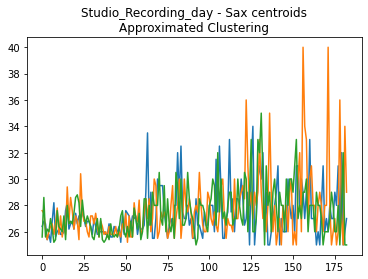

In [102]:
plot_centroids_approximated(cluster_centers_studio_sax, X_sax, album_type, 'Sax')

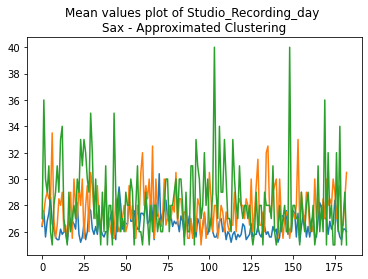

In [103]:
plot_mean_values_approximated(labels_studio_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  176.27633582778648 Silhouette Score:  0.2254347668791588

k:  3 SSE:  125.82113529440834 Silhouette Score:  0.19556614965202335

k:  4 SSE:  86.47738529440834 Silhouette Score:  0.14417937377799303

k:  5 SSE:  53.6228413947164 Silhouette Score:  0.09303737918248296

k:  6 SSE:  28.023015873015872 Silhouette Score:  0.048135207729244296

k:  7 SSE:  11.383630952380958 Silhouette Score:  0.03652179868164368



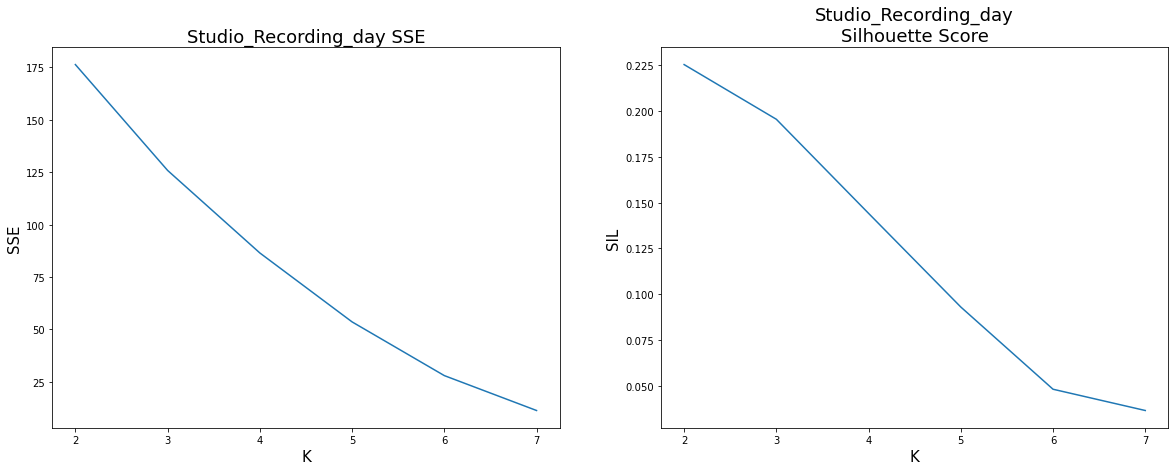

In [104]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [105]:
cluster_centers_studio_sax_dtw, dict_label_studio_sax_dtw, \
labels_studio_sax_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  125.82113529440834
Silhouette Score:  0.19556614965202335


0   1   2   3   4   5   6   7   8   9  ...  174  175  \
track_date_created                                          ...             
2009_studio         25  25  25  25  26  26  25  25  25  25  ...   26   28   
2010_studio         26  26  26  28  28  30  36  26  25  26  ...   32   28   
2011_studio         27  36  30  29  31  26  25  28  29  31  ...   25   25   
2012_studio         27  28  25  25  28  36  28  27  26  25  ...   26   29   
2013_studio         26  31  25  30  29  28  27  28  27  25  ...   26   28   
2014_studio         27  28  28  28  28  27  27  26  25  25  ...   28   32   
2015_studio         27  26  25  26  26  26  26  25  25  27  ...   27   25   
2016_studio         27  29  31  30  29  27  31  28  26  27  ...   28   30   

                    176  177  178  179  180  181  182  Labels  
track_date_created                                             
2009_studio          26   26   25   26   28   26   25       1  
2010_studio          27   30   30   26   26   30   25       0  
2011_studio          32   26   34   25   27   29   25       0  
2012_studio          27   25   26   26   27   26   27       1  
2013_studio          28   26   25   25   25   27   26       1  
2014_studio          30   28   26   25   26   26   26       1  
2015_studio          26   26   26   25   25   26   26       1  
2016_studio          27   27   29   27   27   27   36       2  

[8 rows x 184 columns]


Cluster 0
 ['2010_studio', '2011_studio']

Cluster 1
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 2
 ['2016_studio']




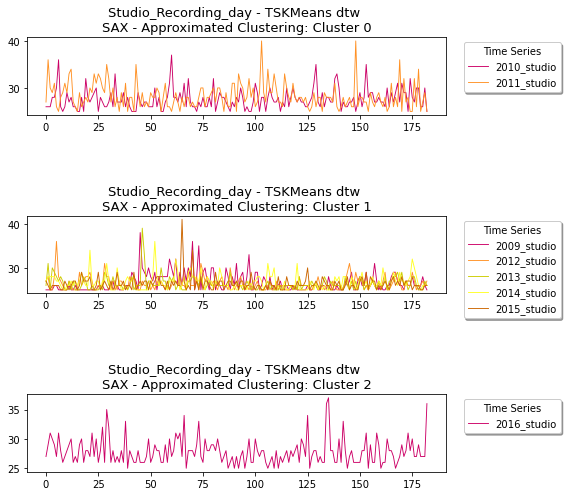

In [106]:
analyze_approximated_clusters(labels_studio_sax_dtw, X_sax, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

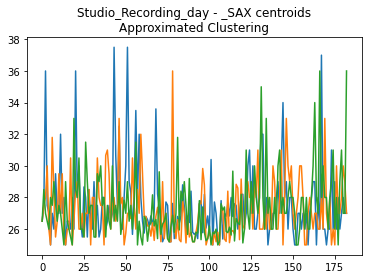

In [107]:
plot_centroids_approximated(cluster_centers_studio_sax_dtw, X_sax, album_type, '_SAX')

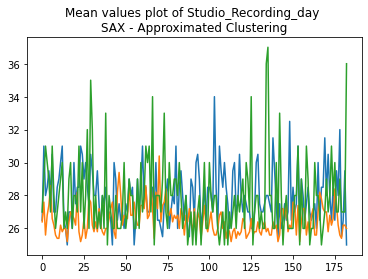

In [108]:
plot_mean_values_approximated(labels_studio_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [109]:
album_type = "Live_Recording_day"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [110]:
df_live

1    2   3  4  5   6   7   8   9  10  ...  357  358  359  \
track_date_created                                        ...                  
2009_live           0  128   0  0  1  11   0   0   0   0  ...    0    0    0   
2010_live           0    0   2  0  1   0   1  19   2   0  ...    0    0    0   
2011_live           4    1   0  0  0   0   1   1   0   0  ...    0    0    0   
2012_live           0    0   0  8  0   0   0   0   0   6  ...    0    0    0   
2013_live           0    0  17  0  0   0   0   0   0   6  ...    0    0    0   
2014_live           0   21   0  0  0   0   0   0   7   7  ...    0    0    0   
2015_live           0    0   0  0  1   0   0   5  13   0  ...    0    0    0   
2016_live           0    0   0  0  3   1  18   1   0   0  ...    3   22    0   

                    360  361  362  363  364  365  366  
track_date_created                                     
2009_live             0    1    9    0    0    0    0  
2010_live             1    0    1    0    0    0    0  
2011_live             0    0    0    0    0    0    0  
2012_live             0    0    0    0    0    0    0  
2013_live             0    0    0    0    0    0    0  
2014_live             0    0    0    0    0    0    0  
2015_live             0    0    0    7   13    8    0  
2016_live             0    0    0    2    0    0    0  

[8 rows x 366 columns]

In [111]:
df_live.shape

(8, 366)

In [112]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[  0.],
        [128.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  2.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  4.],
        [  1.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       ...,

       [[  0.],
        [ 21.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [ 13.],
        [  8.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]]])

In [113]:
tss_live.shape

(8, 366, 1)

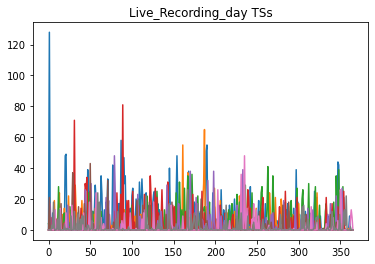

In [114]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [115]:
tss_live_scaled = TimeSeriesScalerMinMax().fit_transform(tss_live)
tss_live_scaled

array([[[0.        ],
        [1.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.03076923],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.09756098],
        [0.02439024],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.        ],
        [0.48837209],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.27083333],
        [0.16666667],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [116]:
tss_live_scaled.shape

(8, 366, 1)

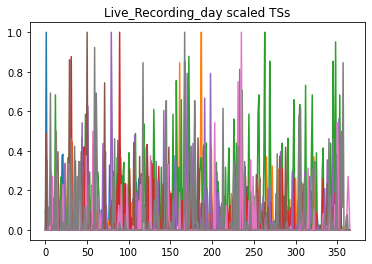

In [117]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [118]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         357       358  359       360       361       362  \
track_date_created                                                          
2009_live           0.000000  0.000000  0.0  0.000000  0.007812  0.070312   
2010_live           0.000000  0.000000  0.0  0.015385  0.000000  0.015385   
2011_live           0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2013_live           0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2014_live           0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2016_live           0.115385  0.846154  0.0  0.000000  0.000000  0.000000   

                         363       364       365  366  
track_date_created                                     
2009_live           0.000000  0.000000  0.000000  0.0  
2010_live           0.000000  0.000000  0.000000  0.0  
2011_live           0.000000  0.000000  0.000000  0.0  
2012_live           0.000000  0.000000  0.000000  0.0  
2013_live           0.000000  0.000000  0.000000  0.0  
2014_live           0.000000  0.000000  0.000000  0.0  
2015_live           0.145833  0.270833  0.166667  0.0  
2016_live           0.076923  0.000000  0.000000  0.0  

[8 rows x 366 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  4.170310181573942 Silhouette Score:  0.255243061421536

k:  3 SSE:  3.0506407211125612 Silhouette Score:  0.13519222770450107

k:  4 SSE:  2.16895061516556 Silhouette Score:  0.08840929951897092

k:  5 SSE:  1.5248342668780097 Silhouette Score:  0.031459376802256

k:  6 SSE:  0.9372344001188344 Silhouette Score:  0.03303332225298694

k:  7 SSE:  0.44523342291428114 Silhouette Score:  0.013989916704022113



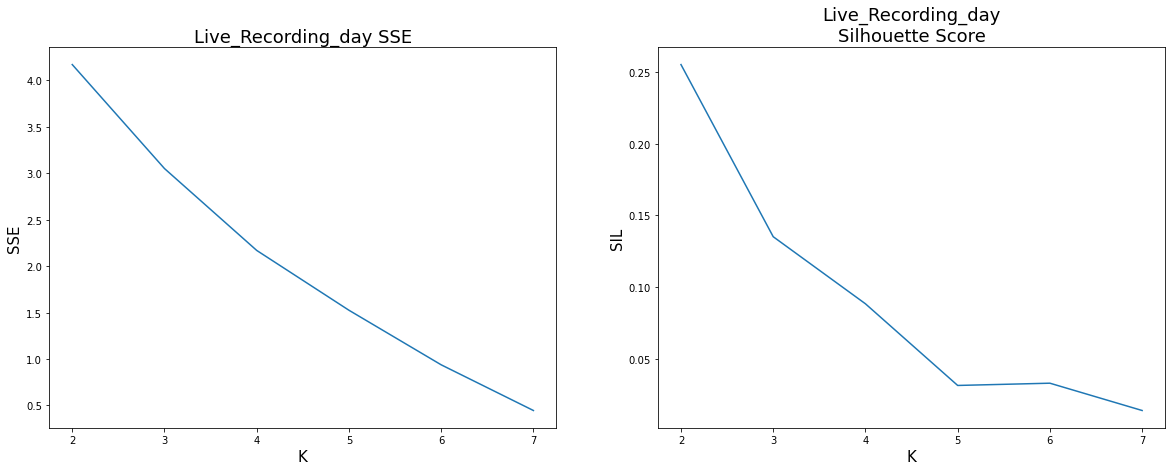

In [119]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [120]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(3, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  3.0506407211125612
Silhouette Score:  0.13519222770450107


In [121]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         358  359       360       361       362       363  \
track_date_created                                                          
2009_live           0.000000  0.0  0.000000  0.007812  0.070312  0.000000   
2010_live           0.000000  0.0  0.015385  0.000000  0.015385  0.000000   
2011_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2012_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2013_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2014_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2015_live           0.000000  0.0  0.000000  0.000000  0.000000  0.145833   
2016_live           0.846154  0.0  0.000000  0.000000  0.000000  0.076923   

                         364       365  366  Labels  
track_date_created                                   
2009_live           0.000000  0.000000  0.0       1  
2010_live           0.000000  0.000000  0.0       1  
2011_live           0.000000  0.000000  0.0       2  
2012_live           0.000000  0.000000  0.0       1  
2013_live           0.000000  0.000000  0.0       1  
2014_live           0.000000  0.000000  0.0       1  
2015_live           0.270833  0.166667  0.0       1  
2016_live           0.000000  0.000000  0.0       0  

[8 rows x 367 columns]

Cluster 0
 ['2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 2
 ['2011_live']



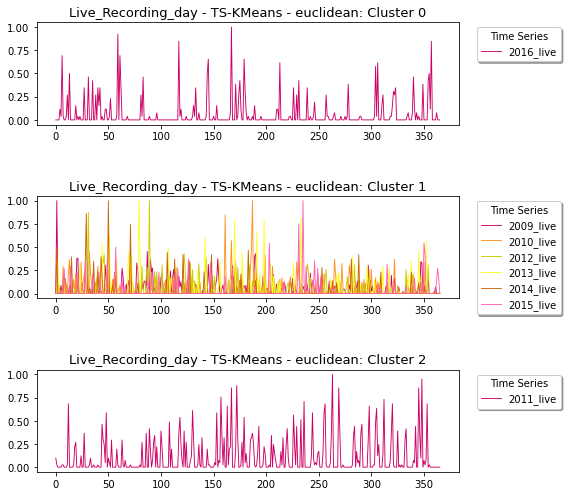

In [122]:
analyze_clusters(labels_live_eu, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

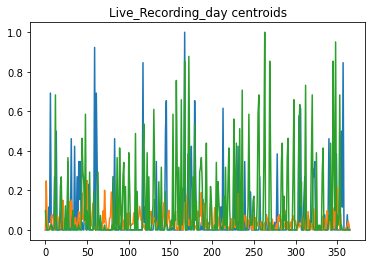

In [123]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  1.0759376029991867 Silhouette Score:  0.35643065227337345

k:  3 SSE:  0.7734442775355794 Silhouette Score:  0.08961585398245145

k:  4 SSE:  0.49562445885969036 Silhouette Score:  0.07224289284223177

k:  5 SSE:  0.334182528936315 Silhouette Score:  0.04892051015526437

k:  6 SSE:  0.19300870793222008 Silhouette Score:  0.0659803645357706

k:  7 SSE:  0.07551502120280894 Silhouette Score:  0.047942358795891364



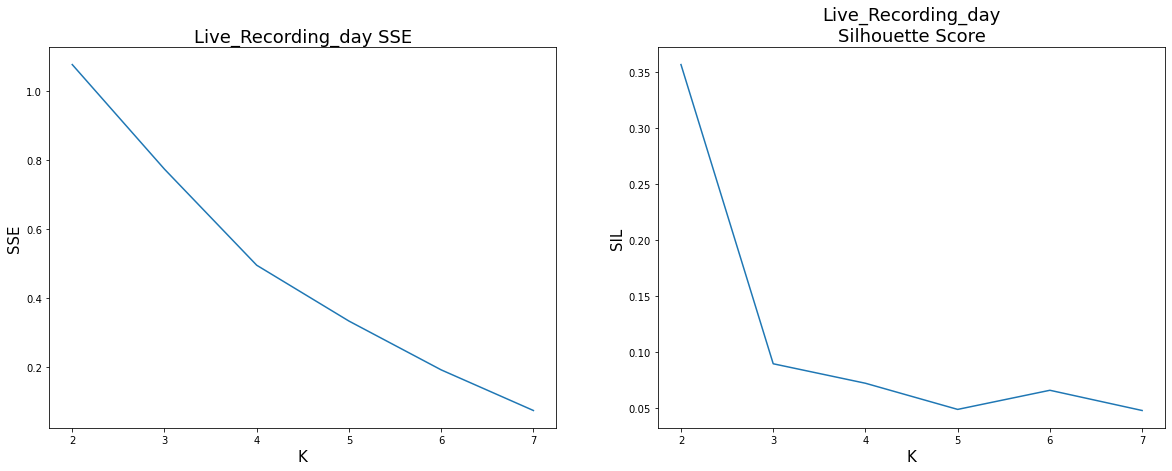

In [124]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [125]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(3, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  0.7734442775355794
Silhouette Score:  0.08961585398245145


In [126]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         358  359       360       361       362       363  \
track_date_created                                                          
2009_live           0.000000  0.0  0.000000  0.007812  0.070312  0.000000   
2010_live           0.000000  0.0  0.015385  0.000000  0.015385  0.000000   
2011_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2012_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2013_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2014_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2015_live           0.000000  0.0  0.000000  0.000000  0.000000  0.145833   
2016_live           0.846154  0.0  0.000000  0.000000  0.000000  0.076923   

                         364       365  366  Labels  
track_date_created                                   
2009_live           0.000000  0.000000  0.0       1  
2010_live           0.000000  0.000000  0.0       1  
2011_live           0.000000  0.000000  0.0       2  
2012_live           0.000000  0.000000  0.0       1  
2013_live           0.000000  0.000000  0.0       0  
2014_live           0.000000  0.000000  0.0       1  
2015_live           0.270833  0.166667  0.0       0  
2016_live           0.000000  0.000000  0.0       0  

[8 rows x 367 columns]

Cluster 0
 ['2013_live', '2015_live', '2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2014_live']

Cluster 2
 ['2011_live']



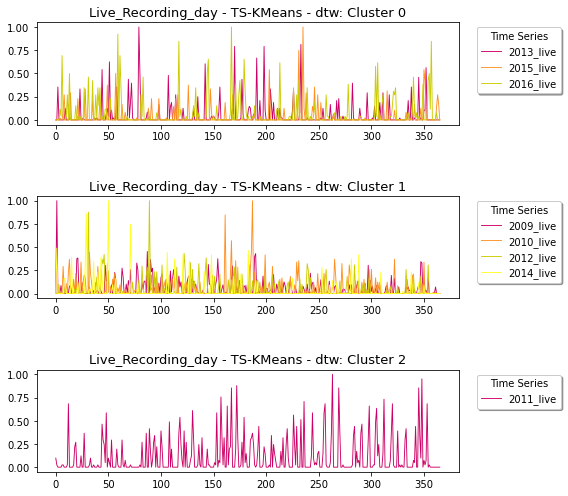

In [127]:
analyze_clusters(labels_live_dtw, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

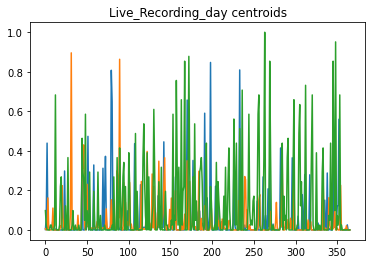

In [128]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  33.362481452591524 Silhouette Score:  0.2552430614215359
Calinski-Harabaz:  2.6919570727740356 Davies-Bouldin:  0.5220527378894632

k:  3 SSE:  24.405125768900476 Silhouette Score:  0.1351922277045012
Calinski-Harabaz:  2.4508939804473804 Davies-Bouldin:  0.5737777931509727

k:  4 SSE:  17.35160492132448 Silhouette Score:  0.08840929951897084
Calinski-Harabaz:  2.380511491485715 Davies-Bouldin:  0.5746224391445659

k:  5 SSE:  12.19867413502407 Silhouette Score:  0.03145937680225599
Calinski-Harabaz:  2.2214833495158093 Davies-Bouldin:  0.8785814843400968

k:  6 SSE:  7.497875200950677 Silhouette Score:  0.033033322252987066
Calinski-Harabaz:  2.1783771966968066 Davies-Bouldin:  0.6874179779331916

k:  7 SSE:  3.5618673833142496 Silhouette Score:  0.013989916704022116
Calinski-Harabaz:  2.0948285409189538 Davies-Bouldin:  0.44911753536738513



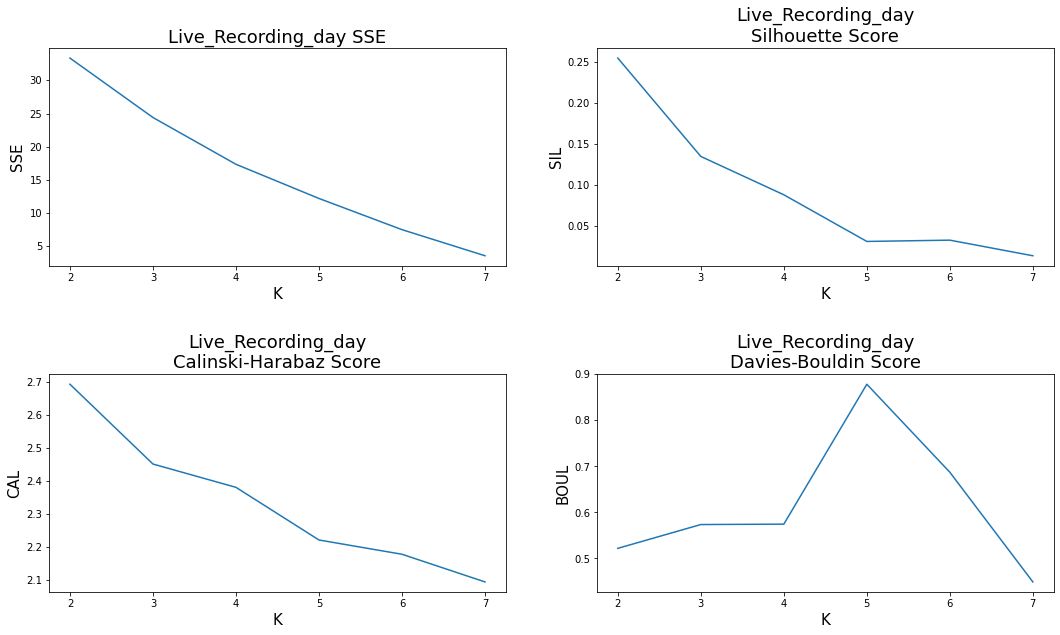

In [129]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

In [130]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(3, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (3, 366)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  24.405125768900476
Silhouette Score:  0.1351922277045012
Calinski - Harabaz Score:  2.4508939804473804
Davies - Bouldin Score:  0.5737777931509727


In [131]:
cluster_insight(df_tss_live_scaled, labels_live_2)

1         2         3         4         5  \
track_date_created                                                     
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         358  359       360       361       362       363  \
track_date_created                                                          
2009_live           0.000000  0.0  0.000000  0.007812  0.070312  0.000000   
2010_live           0.000000  0.0  0.015385  0.000000  0.015385  0.000000   
2011_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2012_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2013_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2014_live           0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2015_live           0.000000  0.0  0.000000  0.000000  0.000000  0.145833   
2016_live           0.846154  0.0  0.000000  0.000000  0.000000  0.076923   

                         364       365  366  Labels  
track_date_created                                   
2009_live           0.000000  0.000000  0.0       1  
2010_live           0.000000  0.000000  0.0       1  
2011_live           0.000000  0.000000  0.0       2  
2012_live           0.000000  0.000000  0.0       1  
2013_live           0.000000  0.000000  0.0       1  
2014_live           0.000000  0.000000  0.0       1  
2015_live           0.270833  0.166667  0.0       1  
2016_live           0.000000  0.000000  0.0       0  

[8 rows x 367 columns]

Cluster 0
 ['2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 2
 ['2011_live']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [132]:
F = [list(calculate_features(x).values())for x in tss_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  112.19519352272783 Silhouette Score:  0.6150628674208265
Calinski-Harabaz:  23.560843076601785 Davies-Bouldin:  0.4402283792285749

k:  3 SSE:  59.08581986840291 Silhouette Score:  0.4932245166610705
Calinski-Harabaz:  20.88818713935289 Davies-Bouldin:  0.3569084557759079

k:  4 SSE:  19.04842256323559 Silhouette Score:  0.5168468853305859
Calinski-Harabaz:  37.3585204136594 Davies-Bouldin:  0.3345752291144968

k:  5 SSE:  8.760583015393694 Silhouette Score:  0.40093557189032786
Calinski-Harabaz:  46.57254268703602 Davies-Bouldin:  0.2108090356115226

k:  6 SSE:  0.4782970007140816 Silhouette Score:  0.41209997309650814
Calinski-Harabaz:  461.8768565309524 Davies-Bouldin:  0.08384958334792442

k:  7 SSE:  0.15693180859121447 Silhouette Score:  0.2167045922555213
Calinski-Harabaz:  586.8867058649174 Davies-Bouldin:  0.03865954373660655



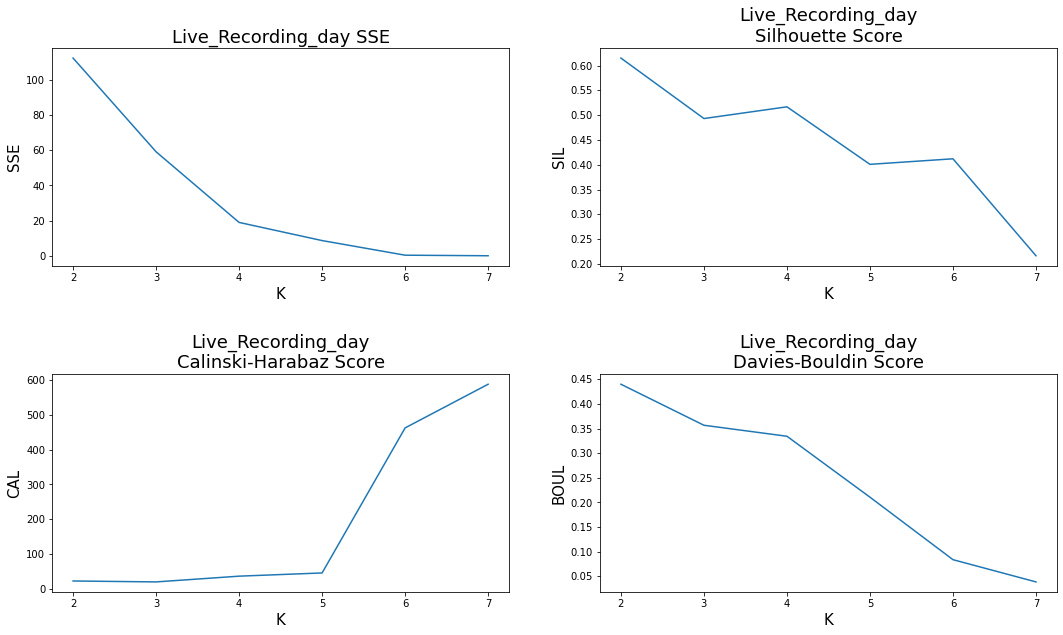

In [133]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [136]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(4, 300, 10, "", F, True)

cluster_centers_shape (4, 5)

Labels:  {0: 2, 1: 2, 2: 1, 3: 3}

SSE:  19.04842256323559
Silhouette Score:  0.5168468853305859
Calinski - Harabaz Score:  37.3585204136594
Davies - Bouldin Score:  0.3345752291144968


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

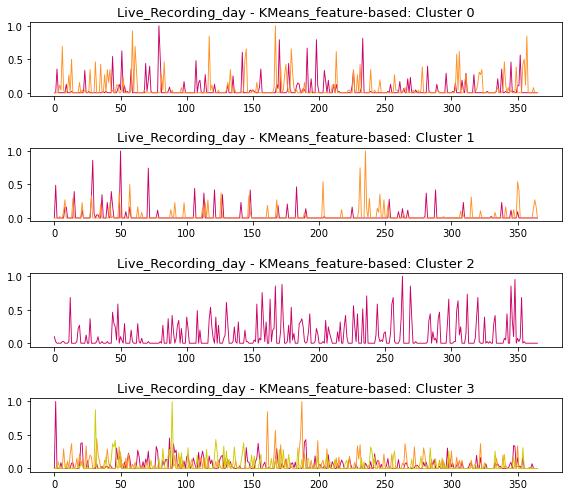

In [137]:
analyze_clusters_fb(labels_live_fb, tss_live_scaled, album_type, 'KMeans_feature-based', False)

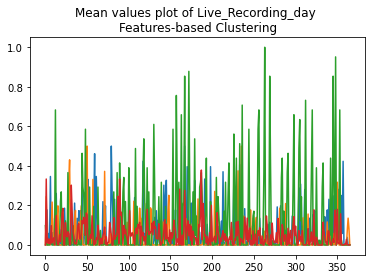

In [138]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [139]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [140]:
print(tss_live_scaled.shape, M.shape)

(8, 366, 1) (8, 8)


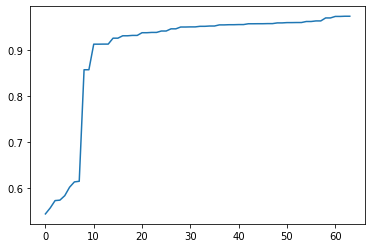

In [141]:
plt.plot(sorted(M.ravel()))
plt.show()

In [142]:
dbscan_compression_live = DBSCAN(eps=0.93, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.93, metric='precomputed')

In [143]:
dbscan_compression_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [144]:
n_paa_segments = 183
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

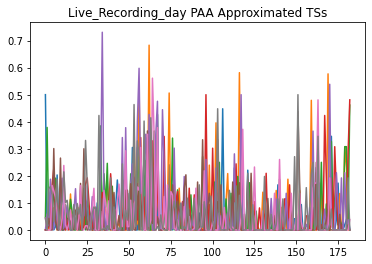

In [145]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

k:  2 SSE:  1.1330135907964956 Silhouette Score:  0.2700609520147077

k:  3 SSE:  0.8129207391667883 Silhouette Score:  0.14932899306145864

k:  4 SSE:  0.5969032533737859 Silhouette Score:  0.055338872105256495

k:  5 SSE:  0.412987323823543 Silhouette Score:  0.04461581240566975

k:  6 SSE:  0.25471610290161795 Silhouette Score:  0.03126505046026226

k:  7 SSE:  0.12405787573920354 Silhouette Score:  0.004769277428336396



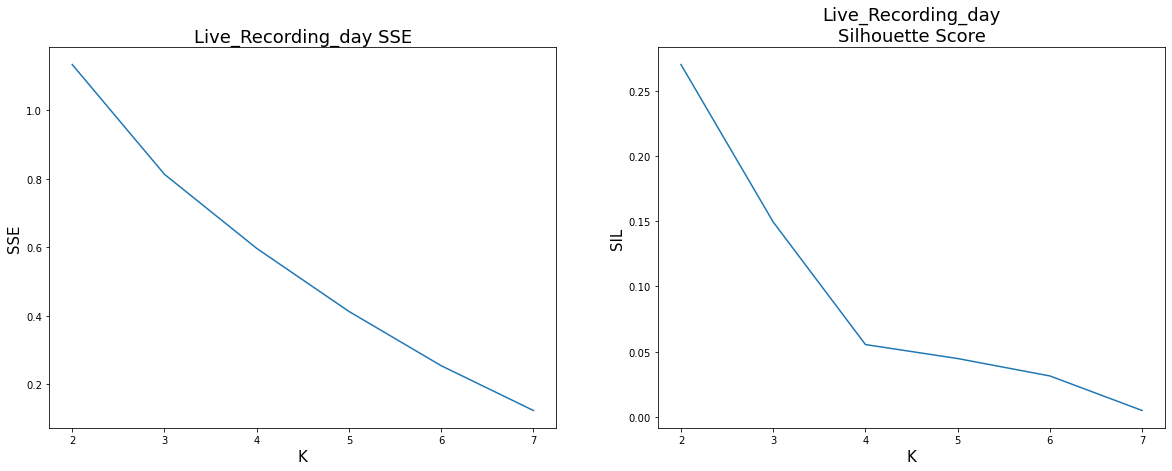

In [146]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [147]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  0.8129207391667883
Silhouette Score:  0.14932899306145864


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.500000  0.000000  0.046875  0.000000  0.000000   
2010_live           0.000000  0.015385  0.007692  0.153846  0.015385   
2011_live           0.060976  0.000000  0.000000  0.024390  0.000000   
2012_live           0.000000  0.049383  0.000000  0.000000  0.037037   
2013_live           0.000000  0.177083  0.000000  0.000000  0.062500   
2014_live           0.244186  0.000000  0.000000  0.000000  0.162791   
2015_live           0.000000  0.000000  0.010417  0.052083  0.135417   
2016_live           0.000000  0.000000  0.076923  0.365385  0.000000   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_live           0.000000  0.042969  0.042969  0.000000  0.003906  ...   
2010_live           0.053846  0.300000  0.000000  0.092308  0.107692  ...   
2011_live           0.012195  0.341463  0.000000  0.012195  0.243902  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.030864  ...   
2013_live           0.000000  0.010417  0.000000  0.000000  0.000000  ...   
2014_live           0.000000  0.000000  0.197674  0.000000  0.000000  ...   
2015_live           0.000000  0.000000  0.145833  0.000000  0.000000  ...   
2016_live           0.153846  0.250000  0.000000  0.000000  0.076923  ...   

                         174       175       176       177       178  \
track_date_created                                                     
2009_live           0.164062  0.093750  0.015625  0.082031  0.000000   
2010_live           0.053846  0.169231  0.007692  0.000000  0.000000   
2011_live           0.475610  0.048780  0.378049  0.012195  0.000000   
2012_live           0.000000  0.018519  0.000000  0.154321  0.000000   
2013_live           0.000000  0.104167  0.281250  0.000000  0.000000   
2014_live           0.000000  0.046512  0.000000  0.000000  0.000000   
2015_live           0.000000  0.479167  0.000000  0.000000  0.000000   
2016_live           0.192308  0.000000  0.000000  0.461538  0.480769   

                         179       180       181       182  Labels  
track_date_created                                                  
2009_live           0.000000  0.039062  0.000000  0.000000       1  
2010_live           0.007692  0.007692  0.000000  0.000000       1  
2011_live           0.000000  0.000000  0.000000  0.000000       2  
2012_live           0.000000  0.000000  0.000000  0.000000       1  
2013_live           0.000000  0.000000  0.000000  0.000000       1  
2014_live           0.000000  0.000000  0.000000  0.000000       1  
2015_live           0.000000  0.000000  0.208333  0.083333       1  
2016_live           0.000000  0.000000  0.038462  0.000000       0  

[8 rows x 184 columns]


Cluster 0
 ['2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 2
 ['2011_live']




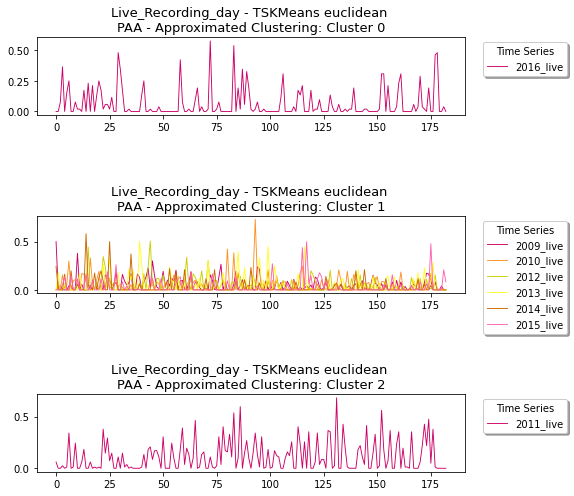

In [148]:
analyze_approximated_clusters(labels_live_paa, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

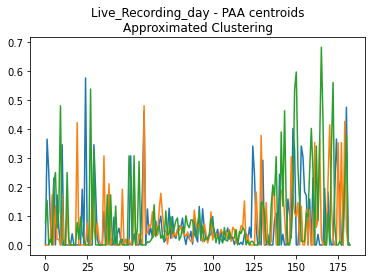

In [149]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type, 'PAA')

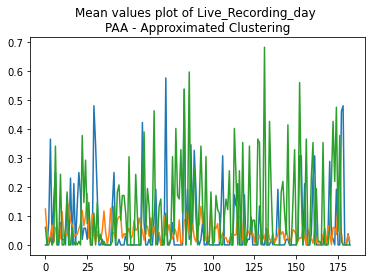

In [150]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.33279672759963946 Silhouette Score:  0.3469612362397629

k:  3 SSE:  0.24431462827714628 Silhouette Score:  0.10744816593582839

k:  4 SSE:  0.15970775234808288 Silhouette Score:  0.09191559804566696

k:  5 SSE:  0.11256323838737486 Silhouette Score:  0.04983189358842374

k:  6 SSE:  0.07018742134584267 Silhouette Score:  0.031123561721010204

k:  7 SSE:  0.03280012158571674 Silhouette Score:  0.019694845621586944



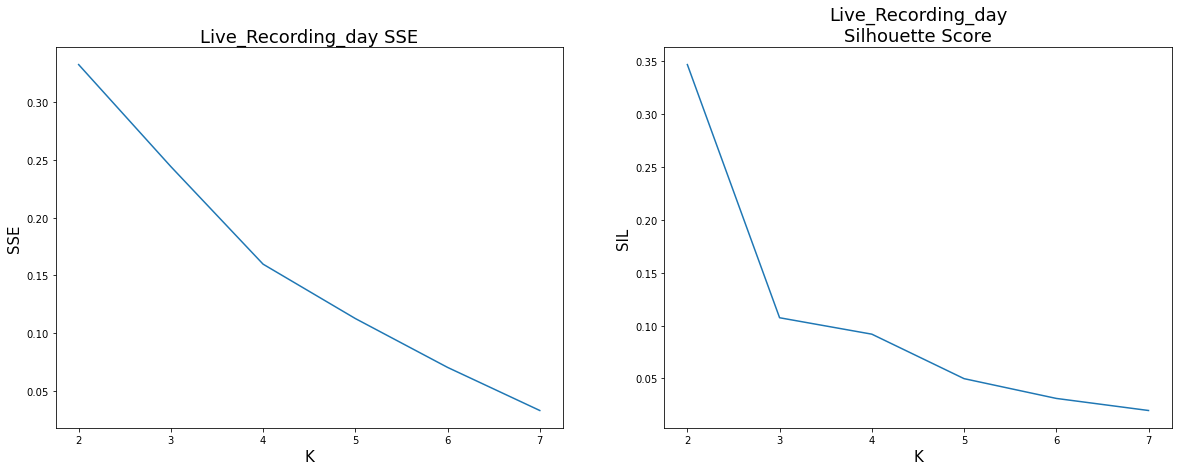

In [151]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [152]:
cluster_centers_live_paa_dtw, dict_label_live_paa_dtw, labels_live_paa_dtw = run_kmeans(3, 300, 10, 'dtw', X_paa,\
                                                                      False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  0.24431462827714628
Silhouette Score:  0.10744816593582839


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.500000  0.000000  0.046875  0.000000  0.000000   
2010_live           0.000000  0.015385  0.007692  0.153846  0.015385   
2011_live           0.060976  0.000000  0.000000  0.024390  0.000000   
2012_live           0.000000  0.049383  0.000000  0.000000  0.037037   
2013_live           0.000000  0.177083  0.000000  0.000000  0.062500   
2014_live           0.244186  0.000000  0.000000  0.000000  0.162791   
2015_live           0.000000  0.000000  0.010417  0.052083  0.135417   
2016_live           0.000000  0.000000  0.076923  0.365385  0.000000   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_live           0.000000  0.042969  0.042969  0.000000  0.003906  ...   
2010_live           0.053846  0.300000  0.000000  0.092308  0.107692  ...   
2011_live           0.012195  0.341463  0.000000  0.012195  0.243902  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.030864  ...   
2013_live           0.000000  0.010417  0.000000  0.000000  0.000000  ...   
2014_live           0.000000  0.000000  0.197674  0.000000  0.000000  ...   
2015_live           0.000000  0.000000  0.145833  0.000000  0.000000  ...   
2016_live           0.153846  0.250000  0.000000  0.000000  0.076923  ...   

                         174       175       176       177       178  \
track_date_created                                                     
2009_live           0.164062  0.093750  0.015625  0.082031  0.000000   
2010_live           0.053846  0.169231  0.007692  0.000000  0.000000   
2011_live           0.475610  0.048780  0.378049  0.012195  0.000000   
2012_live           0.000000  0.018519  0.000000  0.154321  0.000000   
2013_live           0.000000  0.104167  0.281250  0.000000  0.000000   
2014_live           0.000000  0.046512  0.000000  0.000000  0.000000   
2015_live           0.000000  0.479167  0.000000  0.000000  0.000000   
2016_live           0.192308  0.000000  0.000000  0.461538  0.480769   

                         179       180       181       182  Labels  
track_date_created                                                  
2009_live           0.000000  0.039062  0.000000  0.000000       1  
2010_live           0.007692  0.007692  0.000000  0.000000       1  
2011_live           0.000000  0.000000  0.000000  0.000000       2  
2012_live           0.000000  0.000000  0.000000  0.000000       1  
2013_live           0.000000  0.000000  0.000000  0.000000       1  
2014_live           0.000000  0.000000  0.000000  0.000000       1  
2015_live           0.000000  0.000000  0.208333  0.083333       1  
2016_live           0.000000  0.000000  0.038462  0.000000       0  

[8 rows x 184 columns]


Cluster 0
 ['2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 2
 ['2011_live']




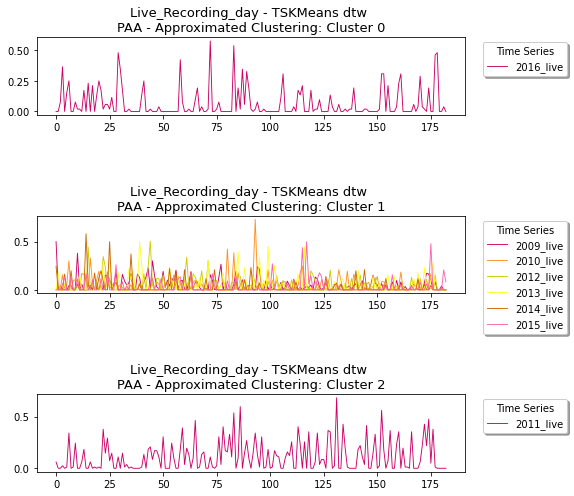

In [153]:
analyze_approximated_clusters(labels_live_paa_dtw, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

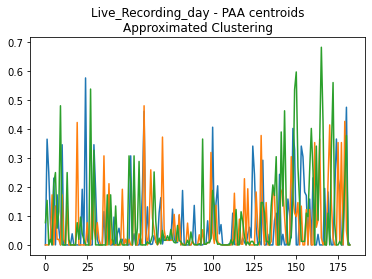

In [154]:
plot_centroids_approximated(cluster_centers_live_paa_dtw, X_paa, album_type, 'PAA')

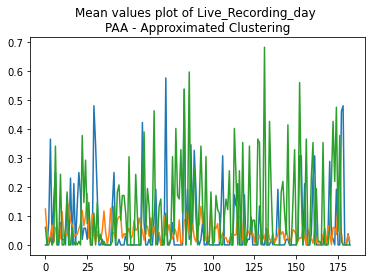

In [155]:
plot_mean_values_approximated(labels_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [156]:
n_sax1d_segments = 183
n_sax_symbols_avg = 50
#n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg)#, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_live_scaled)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  514.9999999999993 Silhouette Score:  0.24064191574860325

k:  3 SSE:  383.1249999999997 Silhouette Score:  0.12109330359861104

k:  4 SSE:  288.875 Silhouette Score:  0.03683071456197861

k:  5 SSE:  203.5625 Silhouette Score:  0.02601682510690382

k:  6 SSE:  123.08333333333329 Silhouette Score:  0.02632956276204764

k:  7 SSE:  60.8125 Silhouette Score:  0.002201059411197249



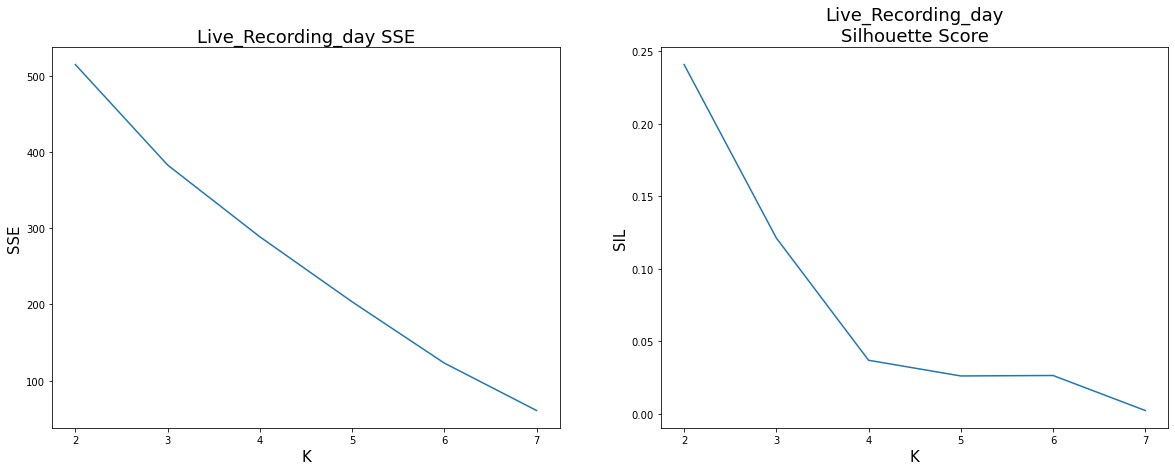

In [157]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [158]:
cluster_centers_live_sax1d, dict_label_live_sax1d, \
labels_live_sax1d = run_kmeans(3, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (3, 183, 2)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  383.1249999999997
Silhouette Score:  0.12109330359861104


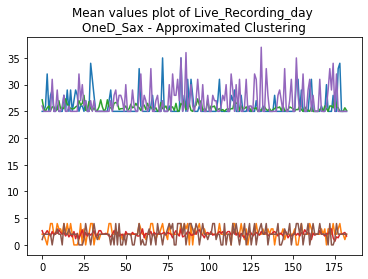

In [159]:
plot_mean_values_approximated(labels_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  227.328858311487 Silhouette Score:  0.30716778830689156

k:  3 SSE:  169.9008717555593 Silhouette Score:  0.04427111263402548

k:  4 SSE:  124.32437793687797 Silhouette Score:  0.022884821652990474

k:  5 SSE:  85.6188640873016 Silhouette Score:  0.020118215007557266

k:  6 SSE:  48.507217261904756 Silhouette Score:  0.021303502969438663

k:  7 SSE:  22.259821428571424 Silhouette Score:  0.017983541784871833



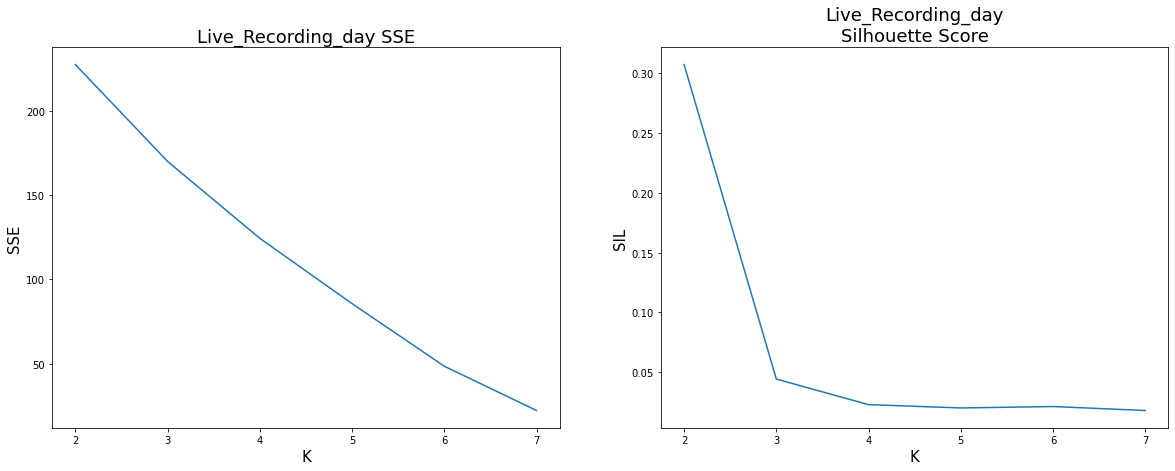

In [160]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [161]:
cluster_centers_live_sax1d_dtw, dict_label_live_sax1d_dtw, \
labels_live_sax1d_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (3, 183, 2)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  169.9008717555593
Silhouette Score:  0.04427111263402548


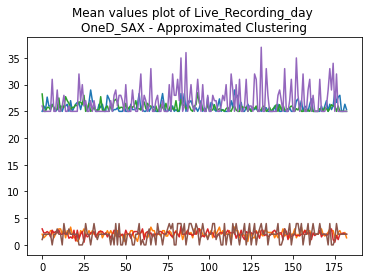

In [162]:
plot_mean_values_approximated(labels_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [163]:
n_sax_segments = 183
n_sax_symbols = 50

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_live_scaled)

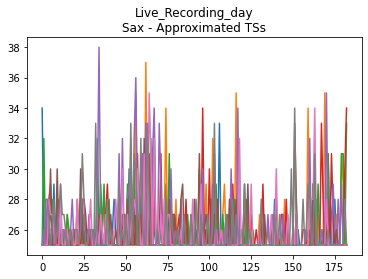

In [164]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>EUCLIDEAN</h3>

k:  2 SSE:  363.1071428571426 Silhouette Score:  0.2773646487587313

k:  3 SSE:  257.1666666666665 Silhouette Score:  0.1597025550075748

k:  4 SSE:  191.40625 Silhouette Score:  0.04667937306666335

k:  5 SSE:  134.71875 Silhouette Score:  0.02638285529316143

k:  6 SSE:  82.50000000000004 Silhouette Score:  0.024212905767813687

k:  7 SSE:  39.5625 Silhouette Score:  0.007564622560394393



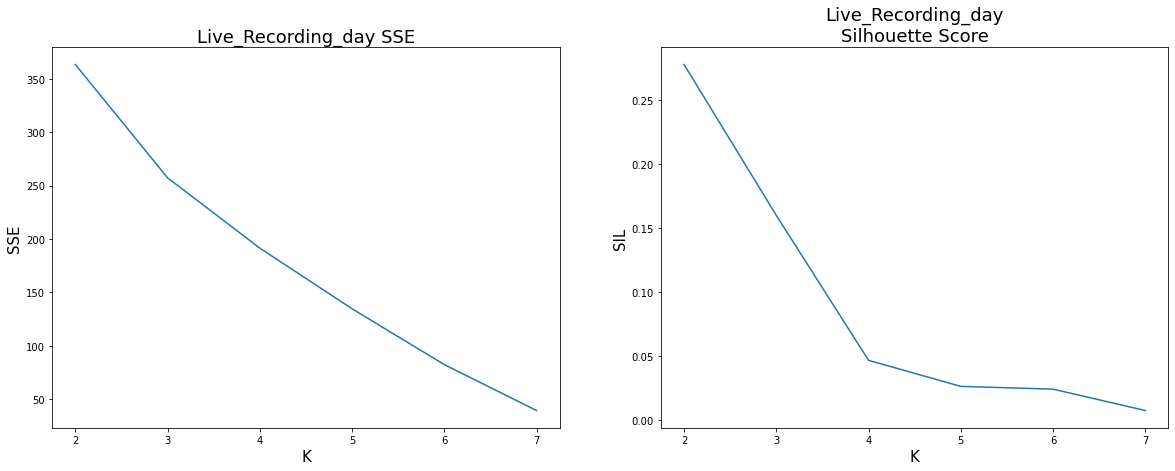

In [165]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [166]:
cluster_centers_live_sax, dict_label_live_sax, \
labels_live_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  257.1666666666665
Silhouette Score:  0.1597025550075748


0   1   2   3   4   5   6   7   8   9  ...  174  175  \
track_date_created                                          ...             
2009_live           34  25  25  25  25  25  25  25  25  25  ...   28   26   
2010_live           25  25  25  28  25  26  30  25  26  27  ...   26   28   
2011_live           26  25  25  25  25  25  31  25  25  29  ...   34   25   
2012_live           25  25  25  25  25  25  25  25  25  25  ...   25   25   
2013_live           25  28  25  25  26  25  25  25  25  25  ...   25   27   
2014_live           29  25  25  25  28  25  25  28  25  25  ...   25   25   
2015_live           25  25  25  26  27  25  25  27  25  25  ...   25   34   
2016_live           25  25  26  32  25  28  29  25  25  26  ...   28   25   

                    176  177  178  179  180  181  182  Labels  
track_date_created                                             
2009_live            25   26   25   25   25   25   25       1  
2010_live            25   25   25   25   25   25   25       1  
2011_live            32   25   25   25   25   25   25       2  
2012_live            25   28   25   25   25   25   25       1  
2013_live            30   25   25   25   25   25   25       1  
2014_live            25   25   25   25   25   25   25       1  
2015_live            25   25   25   25   25   29   26       1  
2016_live            25   33   34   25   25   25   25       0  

[8 rows x 184 columns]


Cluster 0
 ['2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 2
 ['2011_live']




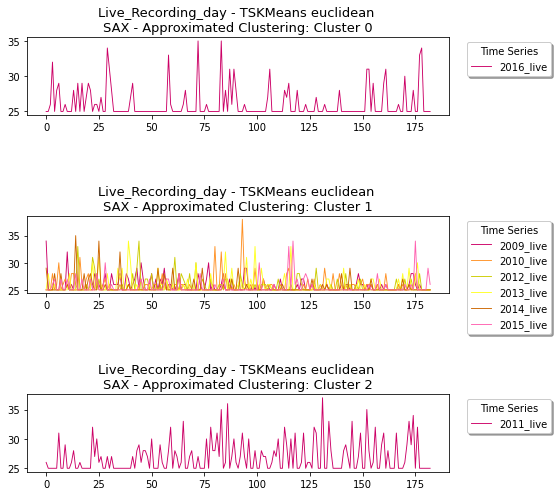

In [167]:
analyze_approximated_clusters(labels_live_sax, X_sax, df_tss_live_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

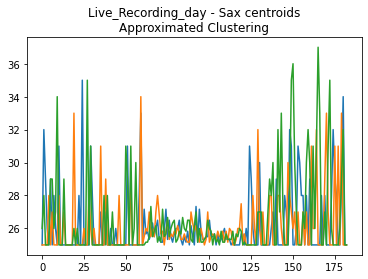

In [168]:
plot_centroids_approximated(cluster_centers_live_sax, X_sax, album_type, 'Sax')

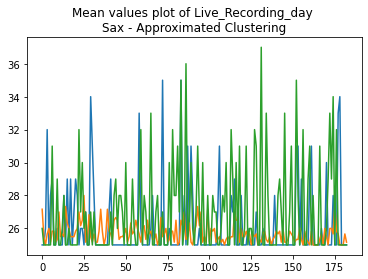

In [169]:
plot_mean_values_approximated(labels_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  102.80487393961414 Silhouette Score:  0.36488488153530474

k:  3 SSE:  75.87738768754399 Silhouette Score:  0.13971243235932607

k:  4 SSE:  48.041330740515534 Silhouette Score:  0.0950022785885405

k:  5 SSE:  33.35859264527744 Silhouette Score:  0.0562364211942855

k:  6 SSE:  19.05853174603175 Silhouette Score:  0.05284852086167442

k:  7 SSE:  8.471031746031752 Silhouette Score:  0.036712889579444255



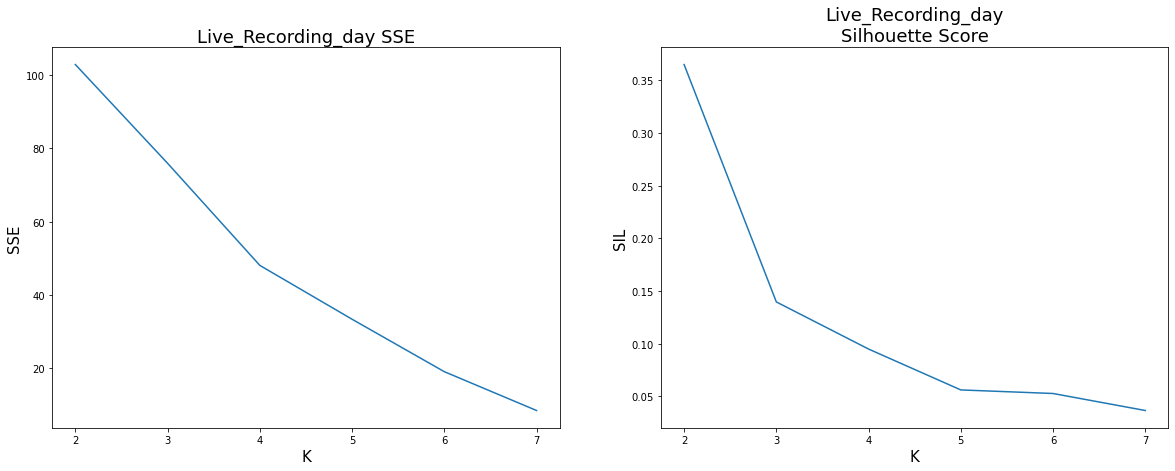

In [170]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [171]:
cluster_centers_live_sax_dtw, dict_label_live_sax_dtw, \
labels_live_sax_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  75.87738768754399
Silhouette Score:  0.13971243235932607


0   1   2   3   4   5   6   7   8   9  ...  174  175  \
track_date_created                                          ...             
2009_live           34  25  25  25  25  25  25  25  25  25  ...   28   26   
2010_live           25  25  25  28  25  26  30  25  26  27  ...   26   28   
2011_live           26  25  25  25  25  25  31  25  25  29  ...   34   25   
2012_live           25  25  25  25  25  25  25  25  25  25  ...   25   25   
2013_live           25  28  25  25  26  25  25  25  25  25  ...   25   27   
2014_live           29  25  25  25  28  25  25  28  25  25  ...   25   25   
2015_live           25  25  25  26  27  25  25  27  25  25  ...   25   34   
2016_live           25  25  26  32  25  28  29  25  25  26  ...   28   25   

                    176  177  178  179  180  181  182  Labels  
track_date_created                                             
2009_live            25   26   25   25   25   25   25       1  
2010_live            25   25   25   25   25   25   25       1  
2011_live            32   25   25   25   25   25   25       2  
2012_live            25   28   25   25   25   25   25       1  
2013_live            30   25   25   25   25   25   25       1  
2014_live            25   25   25   25   25   25   25       1  
2015_live            25   25   25   25   25   29   26       1  
2016_live            25   33   34   25   25   25   25       0  

[8 rows x 184 columns]


Cluster 0
 ['2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 2
 ['2011_live']




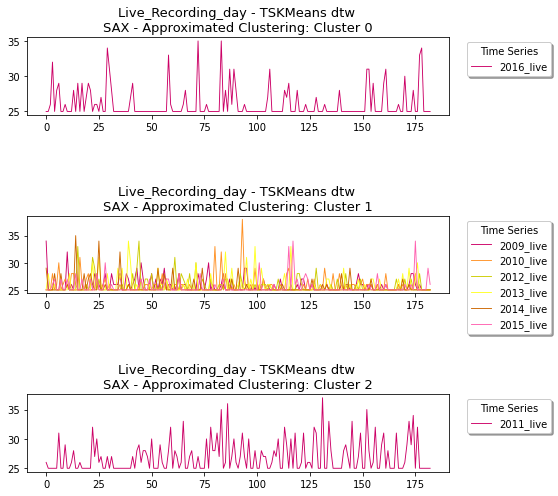

In [172]:
analyze_approximated_clusters(labels_live_sax_dtw, X_sax, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

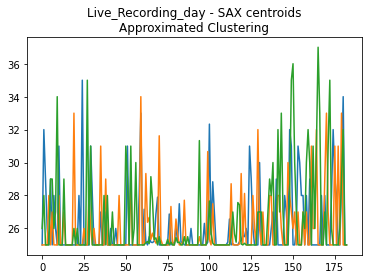

In [173]:
plot_centroids_approximated(cluster_centers_live_sax_dtw, X_sax, album_type, 'SAX')

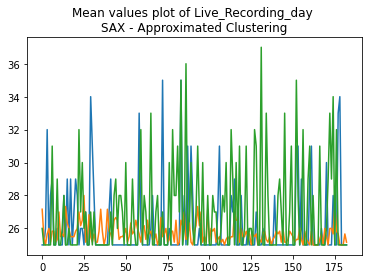

In [174]:
plot_mean_values_approximated(labels_live_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [175]:
album_type = "Studio_Recording_day - Live_Recording_day"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [176]:
df_studio_live

1    2    3   4   5   6    7   8   9  10  ...  357  358  \
track_date_created                                             ...             
2009_studio          0    2    0   0   0   1    0   0  33   0  ...    8    0   
2010_studio         10   21   13  13   4  19   41  34  62  10  ...   55   63   
2011_studio         12   23   85  77  51  29   58  10  35  54  ...  110   21   
2012_studio          9   67   50  46  14   0    5   9  29  77  ...   47   10   
2013_studio         28   33  188  61   6  10  117  85  91  89  ...   16    9   
2014_studio          9   41   57  17  35  40   46  31  13  63  ...   11   25   
2015_studio         50   38   29  33  21   7   32   4  36  22  ...   30   12   
2016_studio         41    6   22  68  99  48   41  73  81  24  ...   53   48   
2009_live            0  128    0   0   1  11    0   0   0   0  ...    0    0   
2010_live            0    0    2   0   1   0    1  19   2   0  ...    0    0   
2011_live            4    1    0   0   0   0    1   1   0   0  ...    0    0   
2012_live            0    0    0   8   0   0    0   0   0   6  ...    0    0   
2013_live            0    0   17   0   0   0    0   0   0   6  ...    0    0   
2014_live            0   21    0   0   0   0    0   0   7   7  ...    0    0   
2015_live            0    0    0   0   1   0    0   5  13   0  ...    0    0   
2016_live            0    0    0   0   3   1   18   1   0   0  ...    3   22   

                    359  360  361  362  363  364  365  366  
track_date_created                                          
2009_studio          20    5    2   78   25    3    3    0  
2010_studio           1   23    1   26   51   65    3    0  
2011_studio           0    2    9   27   38   20    2    0  
2012_studio          20   40   22   55   42   15   41   21  
2013_studio           0    6    6    7    0   80   42    0  
2014_studio          12    0   17   23   12   17   24    0  
2015_studio           8    2    1   15   10   30   44    0  
2016_studio          11   47    4   42   31   21   86  176  
2009_live             0    0    1    9    0    0    0    0  
2010_live             0    1    0    1    0    0    0    0  
2011_live             0    0    0    0    0    0    0    0  
2012_live             0    0    0    0    0    0    0    0  
2013_live             0    0    0    0    0    0    0    0  
2014_live             0    0    0    0    0    0    0    0  
2015_live             0    0    0    0    7   13    8    0  
2016_live             0    0    0    0    2    0    0    0  

[16 rows x 366 columns]

In [177]:
df_studio_live.shape

(16, 366)

In [178]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[ 0.],
        [ 2.],
        [ 0.],
        ...,
        [ 3.],
        [ 3.],
        [ 0.]],

       [[10.],
        [21.],
        [13.],
        ...,
        [65.],
        [ 3.],
        [ 0.]],

       [[12.],
        [23.],
        [85.],
        ...,
        [20.],
        [ 2.],
        [ 0.]],

       ...,

       [[ 0.],
        [21.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [13.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]]])

In [179]:
tss_studio_live.shape

(16, 366, 1)

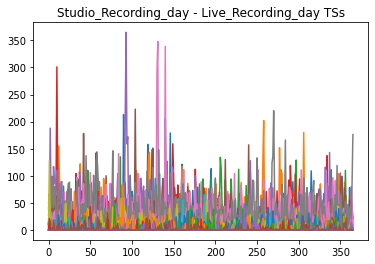

In [180]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [181]:
tss_studio_live_scaled = TimeSeriesScalerMinMax().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[0.        ],
        [0.00938967],
        [0.        ],
        ...,
        [0.01408451],
        [0.01408451],
        [0.        ]],

       [[0.04950495],
        [0.1039604 ],
        [0.06435644],
        ...,
        [0.32178218],
        [0.01485149],
        [0.        ]],

       [[0.08888889],
        [0.17037037],
        [0.62962963],
        ...,
        [0.14814815],
        [0.01481481],
        [0.        ]],

       ...,

       [[0.        ],
        [0.48837209],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.27083333],
        [0.16666667],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [182]:
tss_studio_live_scaled.shape

(16, 366, 1)

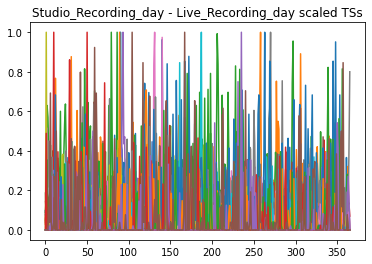

In [183]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [184]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         357       358       359       360       361  \
track_date_created                                                     
2009_studio         0.037559  0.000000  0.093897  0.023474  0.009390   
2010_studio         0.272277  0.311881  0.004950  0.113861  0.004950   
2011_studio         0.814815  0.155556  0.000000  0.014815  0.066667   
2012_studio         0.156146  0.033223  0.066445  0.132890  0.073090   
2013_studio         0.043836  0.024658  0.000000  0.016438  0.016438   
2014_studio         0.049327  0.112108  0.053812  0.000000  0.076233   
2015_studio         0.086207  0.034483  0.022989  0.005747  0.002874   
2016_studio         0.240909  0.218182  0.050000  0.213636  0.018182   
2009_live           0.000000  0.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.000000  0.015385  0.000000   
2011_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2013_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2014_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2016_live           0.115385  0.846154  0.000000  0.000000  0.000000   

                         362       363       3

<h3>Euclidean Distance</h3>

k:  2 SSE:  5.860613150476288 Silhouette Score:  0.17720448462036847

k:  3 SSE:  5.121071674792108 Silhouette Score:  0.1875544907630516

k:  4 SSE:  4.460203786928803 Silhouette Score:  0.13038226030209324

k:  5 SSE:  3.9013293584323137 Silhouette Score:  0.05313494032933162

k:  6 SSE:  3.4508583252278933 Silhouette Score:  0.027192525487201538

k:  7 SSE:  2.8566034732522003 Silhouette Score:  0.020822214283261038

k:  8 SSE:  2.310042718581584 Silhouette Score:  0.028759516523931425

k:  9 SSE:  1.909399065776404 Silhouette Score:  0.02238012717266409

k:  10 SSE:  1.5541891286224252 Silhouette Score:  0.02914028345907714

k:  11 SSE:  1.2035386563071575 Silhouette Score:  0.03362041934841788

k:  12 SSE:  0.9097387229275701 Silhouette Score:  0.035042444886034974

k:  13 SSE:  0.6370280675911429 Silhouette Score:  0.035718490377383116

k:  14 SSE:  0.3910275789888663 Silhouette Score:  0.028656846512939683

k:  15 SSE:  0.1684108675317257 Silhouette Score:  0.020957893110226507


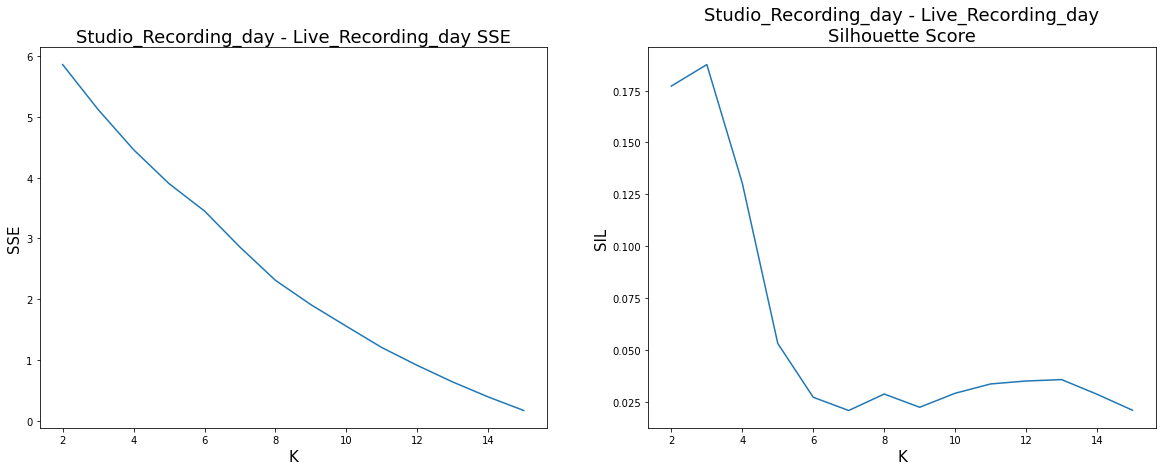

In [185]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

**We can see that best k is 7**

In [186]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(3, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 2, 1: 13, 2: 1}

SSE:  5.121071674792108
Silhouette Score:  0.1875544907630516


In [187]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_eu)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio         0.000000  0.093897  0.023474  0.009390  0.366197   
2010_studio         0.311881  0.004950  0.113861  0.004950  0.128713   
2011_studio         0.155556  0.000000  0.014815  0.066667  0.200000   
2012_studio         0.033223  0.066445  0.132890  0.073090  0.182724   
2013_studio         0.024658  0.000000  0.016438  0.016438  0.019178   
2014_studio         0.112108  0.053812  0.000000  0.076233  0.103139   
2015_studio         0.034483  0.022989  0.005747  0.002874  0.043103   
2016_studio         0.218182  0.050000  0.213636  0.018182  0.190909   
2009_live           0.000000  0.000000  0.000000  0.007812  0.070312   
2010_live           0.000000  0.000000  0.015385  0.000000  0.015385   
2011_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2013_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2014_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2016_live           0.846154  0.000000  0.000000  0.000000  0.000000   

                         363       364       3

Cluster 0
 ['2011_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2010_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 2
 ['2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              0            2  -0.0000  1.0000
Cluster 1                6              7           13   0.9957  0.5385
Cluster 2                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.8090  0.6250

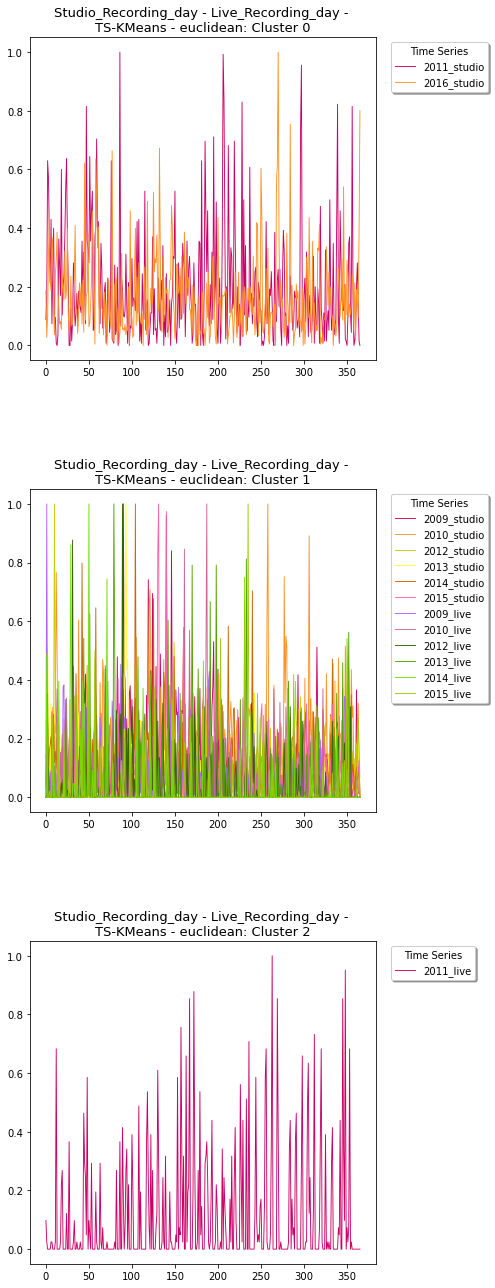

In [188]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 '\nTS-KMeans - euclidean', True)

**Centroids**

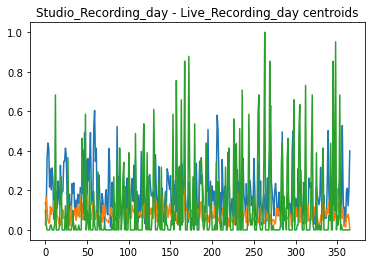

In [189]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  1.7770595083663725 Silhouette Score:  0.2514511424407345

k:  3 SSE:  1.5161291171373392 Silhouette Score:  0.24052603064749278

k:  4 SSE:  1.2909174174666025 Silhouette Score:  0.20341895351786848

k:  5 SSE:  1.0433413213439946 Silhouette Score:  0.07423158777838391

k:  6 SSE:  0.9009514262469651 Silhouette Score:  0.08171898877698883

k:  7 SSE:  0.7389889007316494 Silhouette Score:  0.05995329200057459

k:  8 SSE:  0.5648673258132862 Silhouette Score:  0.06026252050587785

k:  9 SSE:  0.4834030005024248 Silhouette Score:  0.06904640846046647

k:  10 SSE:  0.3792177402935851 Silhouette Score:  0.05343480857556661

k:  11 SSE:  0.2929469779485287 Silhouette Score:  0.0357534955012872

k:  12 SSE:  0.21087923541128392 Silhouette Score:  0.04584426587780571

k:  13 SSE:  0.14832699019630152 Silhouette Score:  0.0366875416791298

k:  14 SSE:  0.08958014683159593 Silhouette Score:  0.027668538809190187

k:  15 SSE:  0.03775751060140447 Silhouette Score:  0.01782766525706556

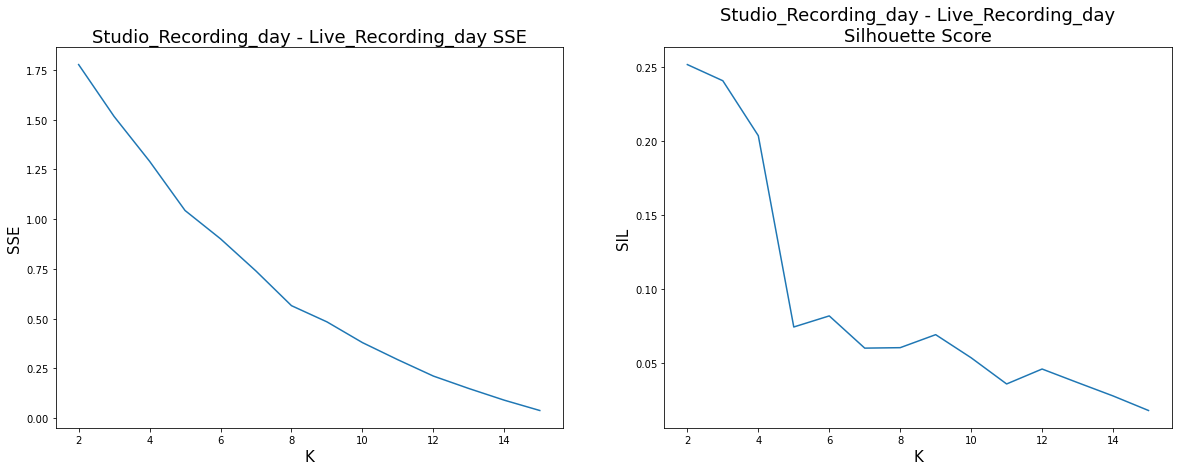

In [190]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 3**

In [191]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, labels_studio_live_dtw = run_kmeans(3, 1000, 10, 'dtw',\
                                                                    tss_studio_live_scaled, False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 3, 1: 12, 2: 1}

SSE:  1.5161291171373392
Silhouette Score:  0.24052603064749278


In [192]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_dtw)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio         0.000000  0.093897  0.023474  0.009390  0.366197   
2010_studio         0.311881  0.004950  0.113861  0.004950  0.128713   
2011_studio         0.155556  0.000000  0.014815  0.066667  0.200000   
2012_studio         0.033223  0.066445  0.132890  0.073090  0.182724   
2013_studio         0.024658  0.000000  0.016438  0.016438  0.019178   
2014_studio         0.112108  0.053812  0.000000  0.076233  0.103139   
2015_studio         0.034483  0.022989  0.005747  0.002874  0.043103   
2016_studio         0.218182  0.050000  0.213636  0.018182  0.190909   
2009_live           0.000000  0.000000  0.000000  0.007812  0.070312   
2010_live           0.000000  0.000000  0.015385  0.000000  0.015385   
2011_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2013_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2014_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2016_live           0.846154  0.000000  0.000000  0.000000  0.000000   

                         363       364       3

Cluster 0
 ['2010_studio', '2011_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 2
 ['2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                3              0            3  -0.0000  1.0000
Cluster 1                5              7           12   0.9799  0.5833
Cluster 2                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.7349  0.6875

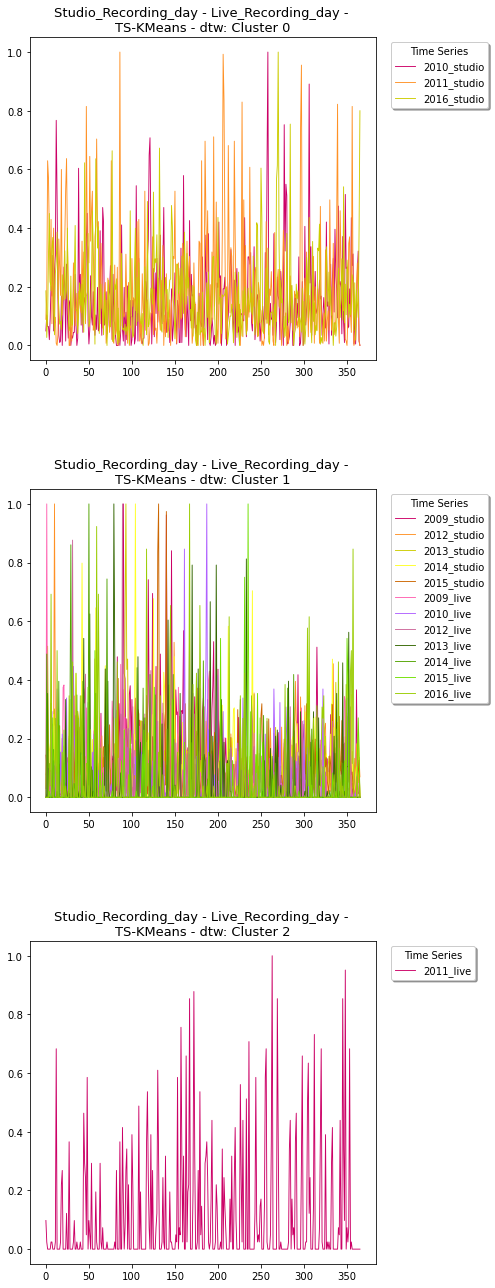

In [193]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 '\nTS-KMeans - dtw', True)

**Centroids**

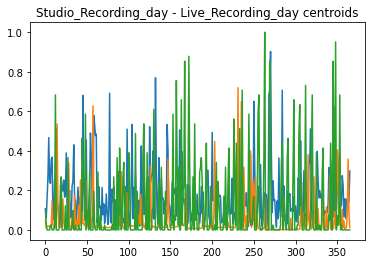

In [194]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  93.76981040762058 Silhouette Score:  0.17720448462036864
Calinski-Harabaz:  2.907420825909273 Davies-Bouldin:  1.9949075207347529

k:  3 SSE:  81.93714679667372 Silhouette Score:  0.18755449076305158
Calinski-Harabaz:  2.483485772332298 Davies-Bouldin:  1.1757955254575325

k:  4 SSE:  71.36326059086086 Silhouette Score:  0.13038226030209368
Calinski-Harabaz:  2.3474263615712005 Davies-Bouldin:  1.00638250682985

k:  5 SSE:  62.42126973491701 Silhouette Score:  0.053134940329331526
Calinski-Harabaz:  2.2389880063148864 Davies-Bouldin:  1.260298806085223

k:  6 SSE:  55.21373320364628 Silhouette Score:  0.02719252548720156
Calinski-Harabaz:  2.101996145156431 Davies-Bouldin:  1.0086800884716414

k:  7 SSE:  45.70565557203521 Silhouette Score:  0.02082221428326099
Calinski-Harabaz:  2.2164960975796726 Davies-Bouldin:  1.199360443300373

k:  8 SSE:  36.96068349730534 Silhouette Score:  0.0287595165239313
Calinski-Harabaz:  2.3587249914600257 Davies-Bouldin:  0.9993839688610004


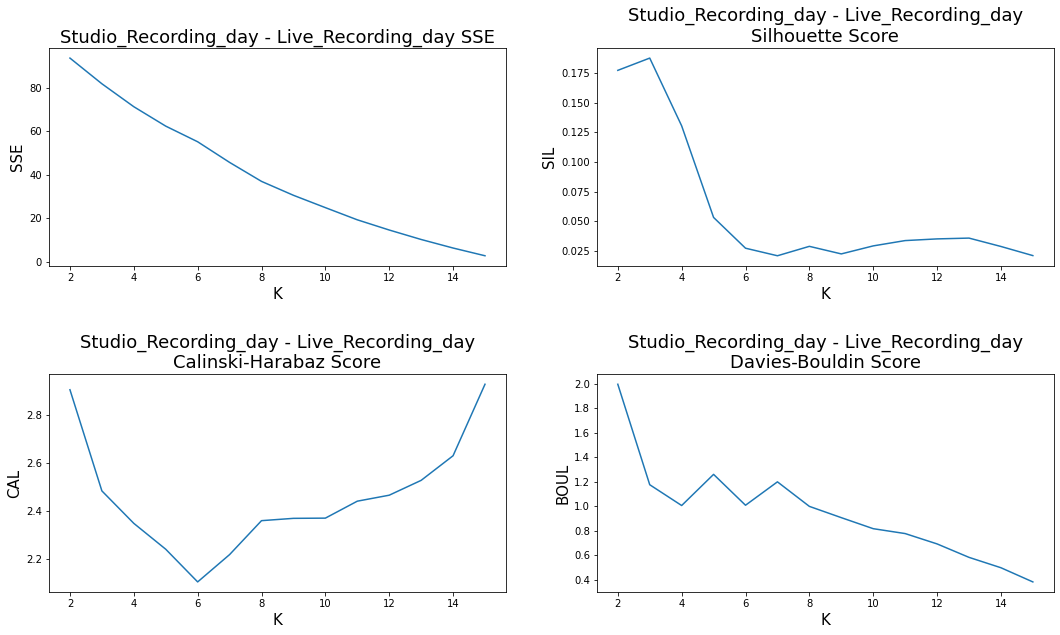

In [195]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [196]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(3, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (3, 366)

Labels:  {0: 2, 1: 13, 2: 1}

SSE:  81.93714679667372
Silhouette Score:  0.18755449076305158
Calinski - Harabaz Score:  2.483485772332298
Davies - Bouldin Score:  1.1757955254575325


In [197]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_2)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.009390  0.000000  0.000000  0.000000   
2010_studio         0.049505  0.103960  0.064356  0.064356  0.019802   
2011_studio         0.088889  0.170370  0.629630  0.570370  0.377778   
2012_studio         0.029900  0.222591  0.166113  0.152824  0.046512   
2013_studio         0.076712  0.090411  0.515068  0.167123  0.016438   
2014_studio         0.040359  0.183857  0.255605  0.076233  0.156951   
2015_studio         0.143678  0.109195  0.083333  0.094828  0.060345   
2016_studio         0.186364  0.027273  0.100000  0.309091  0.450000   
2009_live           0.000000  1.000000  0.000000  0.000000  0.007812   
2010_live           0.000000  0.000000  0.030769  0.000000  0.015385   
2011_live           0.097561  0.024390  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.098765  0.000000   
2013_live           0.000000  0.000000  0.354167  0.000000  0.000000   
2014_live           0.000000  0.488372  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.020833   
2016_live           0.000000  0.000000  0.000000  0.000000  0.115385   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.004695  0.000000  0.000000  0.154930  0.000000  ...   
2010_studio         0.094059  0.202970  0.168317  0.306931  0.049505  ...   
2011_studio         0.214815  0.429630  0.074074  0.259259  0.400000  ...   
2012_studio         0.000000  0.016611  0.029900  0.096346  0.255814  ...   
2013_studio         0.027397  0.320548  0.232877  0.249315  0.243836  ...   
2014_studio         0.179372  0.206278  0.139013  0.058296  0.282511  ...   
2015_studio         0.020115  0.091954  0.011494  0.103448  0.063218  ...   
2016_studio         0.218182  0.186364  0.331818  0.368182  0.109091  ...   
2009_live           0.085938  0.000000  0.000000  0.000000  0.000000  ...   
2010_live           0.000000  0.015385  0.292308  0.030769  0.000000  ...   
2011_live           0.000000  0.024390  0.024390  0.000000  0.000000  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.074074  ...   
2013_live           0.000000  0.000000  0.000000  0.000000  0.125000  ...   
2014_live           0.000000  0.000000  0.000000  0.162791  0.162791  ...   
2015_live           0.000000  0.000000  0.104167  0.270833  0.000000  ...   
2016_live           0.038462  0.692308  0.038462  0.000000  0.000000  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio         0.000000  0.093897  0.023474  0.009390  0.366197   
2010_studio         0.311881  0.004950  0.113861  0.004950  0.128713   
2011_studio         0.155556  0.000000  0.014815  0.066667  0.200000   
2012_studio         0.033223  0.066445  0.132890  0.073090  0.182724   
2013_studio         0.024658  0.000000  0.016438  0.016438  0.019178   
2014_studio         0.112108  0.053812  0.000000  0.076233  0.103139   
2015_studio         0.034483  0.022989  0.005747  0.002874  0.043103   
2016_studio         0.218182  0.050000  0.213636  0.018182  0.190909   
2009_live           0.000000  0.000000  0.000000  0.007812  0.070312   
2010_live           0.000000  0.000000  0.015385  0.000000  0.015385   
2011_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2012_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2013_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2014_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2015_live           0.000000  0.000000  0.000000  0.000000  0.000000   
2016_live           0.846154  0.000000  0.000000  0.000000  0.000000   

                         363       364       3

Cluster 0
 ['2011_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2010_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 2
 ['2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              0            2  -0.0000  1.0000
Cluster 1                6              7           13   0.9957  0.5385
Cluster 2                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.8090  0.6250

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [198]:
F = [list(calculate_features(x).values())for x in tss_studio_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  222.90060719843666 Silhouette Score:  0.7002323684524934
Calinski-Harabaz:  72.5047902886546 Davies-Bouldin:  0.40228738903450567

k:  3 SSE:  111.8884055637494 Silhouette Score:  0.6929276055059086
Calinski-Harabaz:  73.51135863545434 Davies-Bouldin:  0.3516435337720088

k:  4 SSE:  30.269490079590057 Silhouette Score:  0.7239769022849141
Calinski-Harabaz:  178.00287984666946 Davies-Bouldin:  0.3148942360390633

k:  5 SSE:  15.509815719008861 Silhouette Score:  0.6963800365646462
Calinski-Harabaz:  241.4521198205604 Davies-Bouldin:  0.24264727158639382

k:  6 SSE:  8.285695060174431 Silhouette Score:  0.6599672620284154
Calinski-Harabaz:  330.4485348522832 Davies-Bouldin:  0.29595238503002147

k:  7 SSE:  6.153323786075337 Silhouette Score:  0.630752009522807
Calinski-Harabaz:  334.2413747535808 Davies-Bouldin:  0.2921284853276623

k:  8 SSE:  4.232445932061603 Silhouette Score:  0.5747561700218088
Calinski-Harabaz:  370.75519319136913 Davies-Bouldin:  0.2682138417294616



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  9 SSE:  2.3453839556018923 Silhouette Score:  0.5760345774126703
Calinski-Harabaz:  512.9526569509021 Davies-Bouldin:  0.2035790191407714

k:  10 SSE:  1.0478041610855668 Silhouette Score:  0.49543906517100555
Calinski-Harabaz:  875.6316866865494 Davies-Bouldin:  0.2176063553970679

k:  11 SSE:  0.7264389689626997 Silhouette Score:  0.4230091793246613
Calinski-Harabaz:  947.4692378428936 Davies-Bouldin:  0.16335683255722172

k:  12 SSE:  0.4067210472941301 Silhouette Score:  0.37071243796644904
Calinski-Harabaz:  1231.0218555818628 Davies-Bouldin:  0.10933311248542617



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  13 SSE:  0.18882046524436713 Silhouette Score:  0.30052832006279206
Calinski-Harabaz:  1823.2859044786887 Davies-Bouldin:  0.06398691937599131

k:  14 SSE:  0.03188865665315267 Silhouette Score:  0.21726335777188407
Calinski-Harabaz:  6644.521895801707 Davies-Bouldin:  0.03611692141679556

k:  15 SSE:  0.013747831719825583 Silhouette Score:  0.10764275022809416
Calinski-Harabaz:  7155.776955181495 Davies-Bouldin:  0.01820919880588973



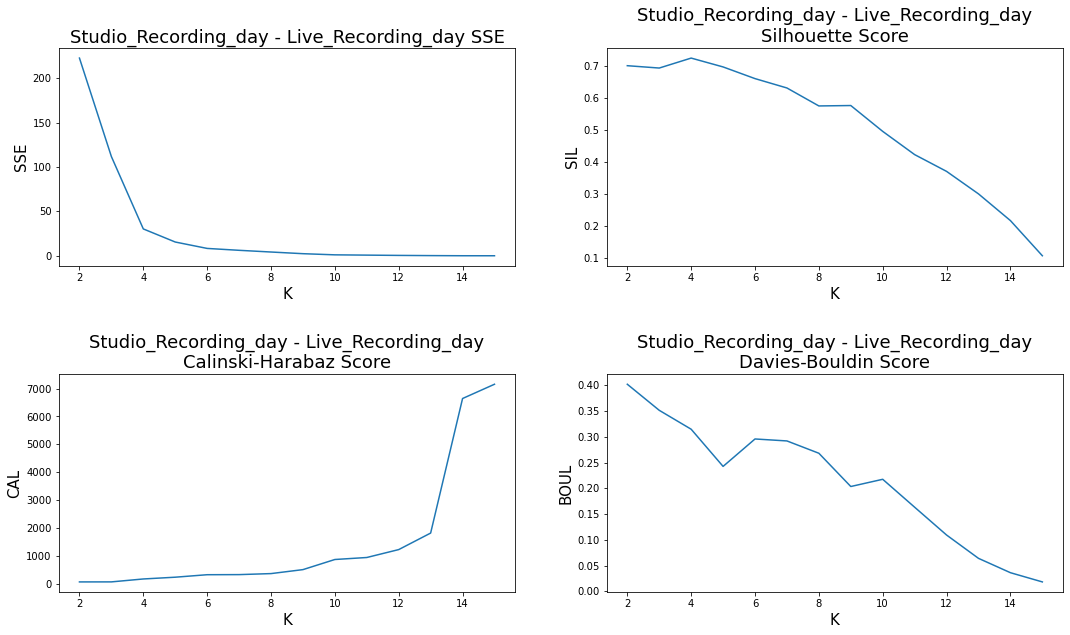

In [199]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [200]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(4, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (4, 5)

Labels:  {0: 4, 1: 3, 2: 4, 3: 5}

SSE:  30.269490079590057
Silhouette Score:  0.7239769022849141
Calinski - Harabaz Score:  178.00287984666946
Davies - Bouldin Score:  0.3148942360390633


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

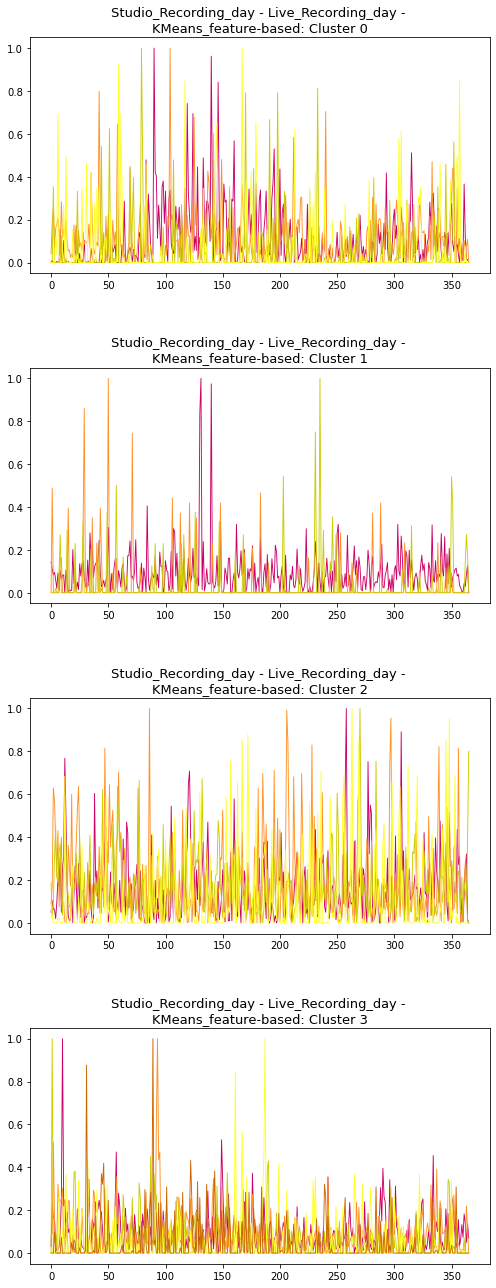

In [201]:
analyze_clusters_fb(labels_studio_live_fb, tss_studio_live_scaled, album_type, '\nKMeans_feature-based', True)

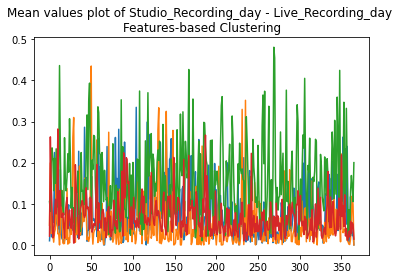

In [202]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [203]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [204]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 366, 1) (16, 16)


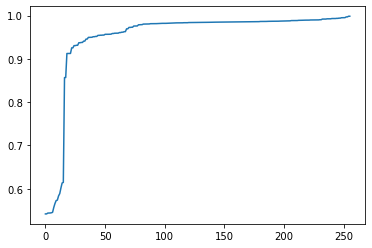

In [205]:
plt.plot(sorted(M.ravel()))
plt.show()

In [206]:
dbscan_compression_studio_live = DBSCAN(eps=0.93, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.93, metric='precomputed')

In [207]:
dbscan_compression_studio_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [208]:
n_paa_segments = 183
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

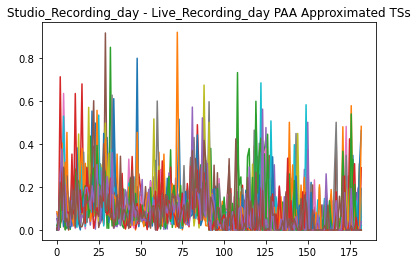

In [209]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>EUCLIDEAN</h3>

k:  2 SSE:  1.7420606947954584 Silhouette Score:  0.20792950115392064

k:  3 SSE:  1.5246884288590998 Silhouette Score:  0.17403646713030074

k:  4 SSE:  1.2924248216252647 Silhouette Score:  0.07313657863316819

k:  5 SSE:  1.1117411897692275 Silhouette Score:  0.0700401145534565

k:  6 SSE:  0.9046860476442331 Silhouette Score:  0.07307312437890504

k:  7 SSE:  0.7684924889741221 Silhouette Score:  0.06981385077600738

k:  8 SSE:  0.6370478266421005 Silhouette Score:  0.061548788238483074

k:  9 SSE:  0.5410578857782463 Silhouette Score:  0.04541536410901018

k:  10 SSE:  0.4370811189704777 Silhouette Score:  0.045854509118641584

k:  11 SSE:  0.34952480174587175 Silhouette Score:  0.03476920138501213

k:  12 SSE:  0.26195588737862013 Silhouette Score:  0.04160923601047695

k:  13 SSE:  0.18282027691765762 Silhouette Score:  0.03555498195095895

k:  14 SSE:  0.11749116333645042 Silhouette Score:  0.022307095434996017

k:  15 SSE:  0.05546222546684865 Silhouette Score:  0.018936127736

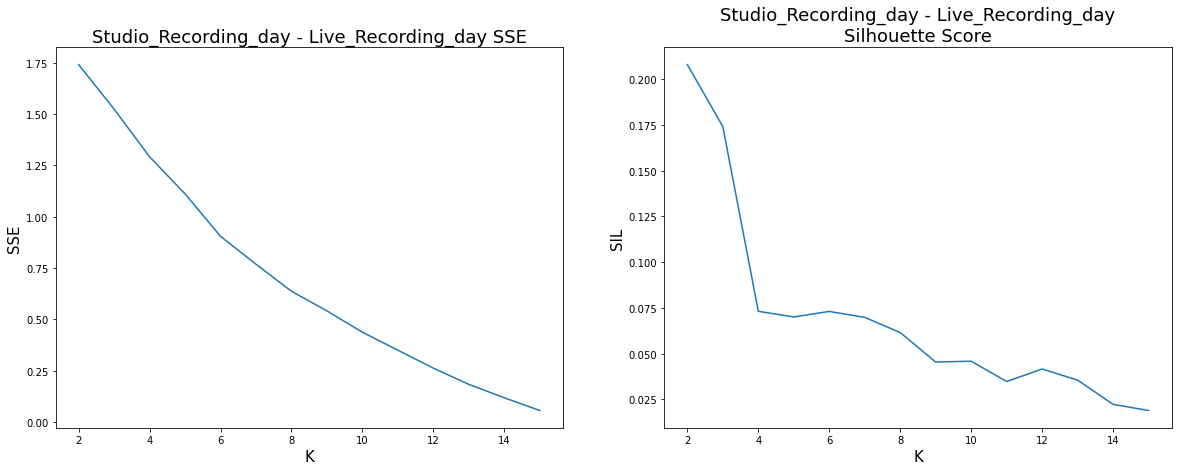

In [210]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [211]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(3, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 13, 1: 2, 2: 1}

SSE:  1.5246884288590998
Silhouette Score:  0.17403646713030074


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.004695  0.000000  0.002347  0.000000  0.077465   
2010_studio         0.076733  0.064356  0.056931  0.185644  0.178218   
2011_studio         0.129630  0.600000  0.296296  0.251852  0.329630   
2012_studio         0.126246  0.159468  0.023256  0.023256  0.176080   
2013_studio         0.083562  0.341096  0.021918  0.276712  0.246575   
2014_studio         0.112108  0.165919  0.168161  0.172646  0.170404   
2015_studio         0.126437  0.089080  0.040230  0.051724  0.083333   
2016_studio         0.106818  0.204545  0.334091  0.259091  0.238636   
2009_live           0.500000  0.000000  0.046875  0.000000  0.000000   
2010_live           0.000000  0.015385  0.007692  0.153846  0.015385   
2011_live           0.060976  0.000000  0.000000  0.024390  0.000000   
2012_live           0.000000  0.049383  0.000000  0.000000  0.037037   
2013_live           0.000000  0.177083  0.000000  0.000000  0.062500   
2014_live           0.244186  0.000000  0.000000  0.000000  0.162791   
2015_live           0.000000  0.000000  0.010417  0.052083  0.135417   
2016_live           0.000000  0.000000  0.076923  0.365385  0.000000   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.051643  0.004695  0.002347  0.000000  0.000000  ...   
2010_studio         0.282178  0.633663  0.099010  0.012376  0.084158  ...   
2011_studio         0.085185  0.003704  0.200000  0.218519  0.351852  ...   
2012_studio         0.609635  0.161130  0.142857  0.073090  0.049834  ...   
2013_studio         0.158904  0.116438  0.152055  0.138356  0.047945  ...   
2014_studio         0.136771  0.150224  0.078475  0.040359  0.031390  ...   
2015_studio         0.081897  0.053161  0.025862  0.011494  0.106322  ...   
2016_studio         0.140909  0.336364  0.154545  0.077273  0.147727  ...   
2009_live           0.000000  0.042969  0.042969  0.000000  0.003906  ...   
2010_live           0.053846  0.300000  0.000000  0.092308  0.107692  ...   
2011_live           0.012195  0.341463  0.000000  0.012195  0.243902  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.030864  ...   
2013_live           0.000000  0.010417  0.000000  0.000000  0.000000  ...   
2014_live           0.000000  0.000000  0.197674  0.000000  0.000000  ...   
2015_live           0.000000  0.000000  0.145833  0.000000  0.000000  ...   
2016_live           0.153846  0.250000  0.000000  0.000000  0.076923  ...   

                         174       175       176       177       178  \
track_date_created                                                     
2009_studio         0.098592  0.185446  0.086854  0.079812  0.018779   
2010_studio         0.388614  0.163366  0.128713  0.267327  0.292079   
2011_studio         0.018519  0.048148  0.359259  0.077778  0.485185   
2012_studio         0.056478  0.252492  0.131229  0.039867  0.094684   
2013_studio         0.090411  0.184932  0.197260  0.082192  0.034247   
2014_studio         0.195067  0.372197  0.291480  0.174888  0.080717   
2015_studio         0.114943  0.048851  0.097701  0.096264  0.060345   
2016_studio         0.156818  0.268182  0.118182  0.118182  0.229545   
2009_live           0.164062  0.093750  0.015625  0.082031  0.000000   
2010_live           0.053846  0.169231  0.007692  0.000000  0.000000   
2011_live           0.475610  0.048780  0.378049  0.012195  0.000000   
2012_live           0.000000  0.018519  0.000000  0.154321  0.000000   
2013_live           0.000000  0.104167  0.281250  0.000000  0.000000   
2014_live           0.000000  0.046512  0.000000  0.000000  0.000000   
2015_live           0.000000  0.479167  0.000000  0.000000  0.000000   
2016_live           0.192308  0.000000  0.000000  0.461538  0.480769   

                         179       180       1

Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2009_live', '2010_live', '2011_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2010_studio', '2016_studio']

Cluster 2
 ['2011_studio']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                5              8           13   0.9612  0.6154
Cluster 1                2              0            2  -0.0000  1.0000
Cluster 2                1              0            1  -0.0000  1.0000
Total                    8              8           16   0.7810  0.6875

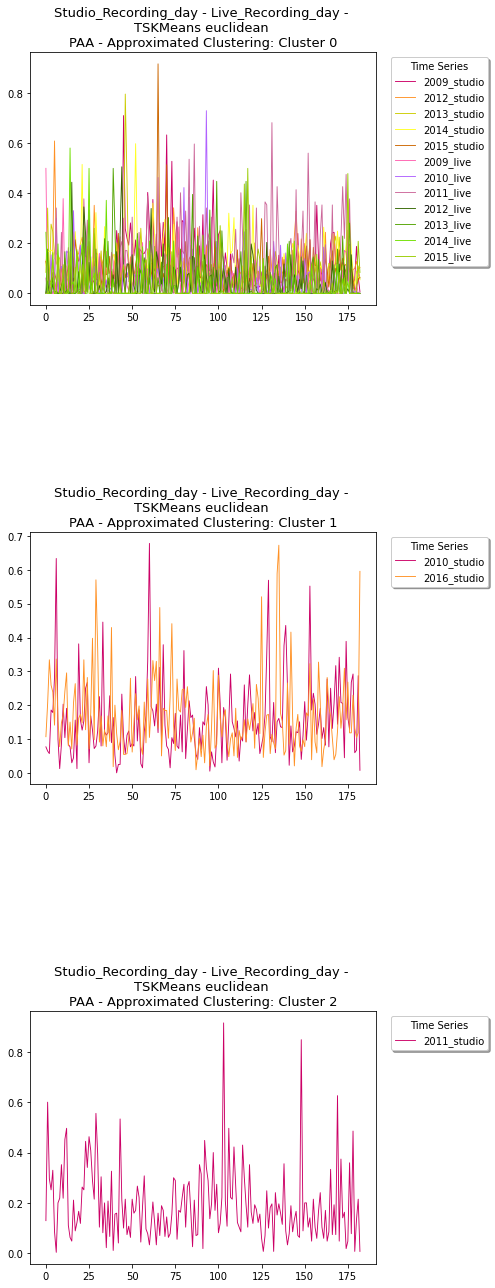

In [212]:
analyze_approximated_clusters(labels_studio_live_paa, X_paa, df_tss_studio_live_scaled, album_type, \
                               '\nTSKMeans euclidean \nPAA - Approximated Clustering', True)

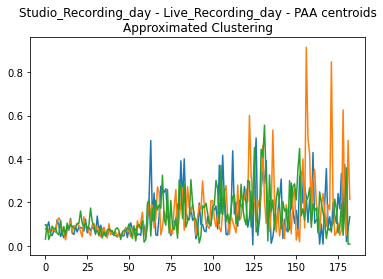

In [213]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type, 'PAA')

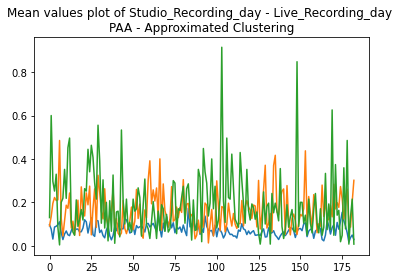

In [214]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.5861937334609482 Silhouette Score:  0.273674648437054

k:  3 SSE:  0.5069373084049982 Silhouette Score:  0.10738315920488961

k:  4 SSE:  0.42931267589230243 Silhouette Score:  0.0867041109156722

k:  5 SSE:  0.35289373558213166 Silhouette Score:  0.06648057191420682

k:  6 SSE:  0.3079136658700674 Silhouette Score:  0.03690180329908349

k:  7 SSE:  0.24340328105691728 Silhouette Score:  0.06964632672091747

k:  8 SSE:  0.18840670897815737 Silhouette Score:  0.07498870149539698

k:  9 SSE:  0.15769201654183834 Silhouette Score:  0.0706463487752641

k:  10 SSE:  0.11692439443145403 Silhouette Score:  0.07256565257972127

k:  11 SSE:  0.09349216988616266 Silhouette Score:  0.052391584272479884

k:  12 SSE:  0.07230426136539655 Silhouette Score:  0.043037418338773115

k:  13 SSE:  0.05242164304080509 Silhouette Score:  0.032988939553093205

k:  14 SSE:  0.03368423572678408 Silhouette Score:  0.02727458150338157

k:  15 SSE:  0.01640006079285837 Silhouette Score:  0.009847422

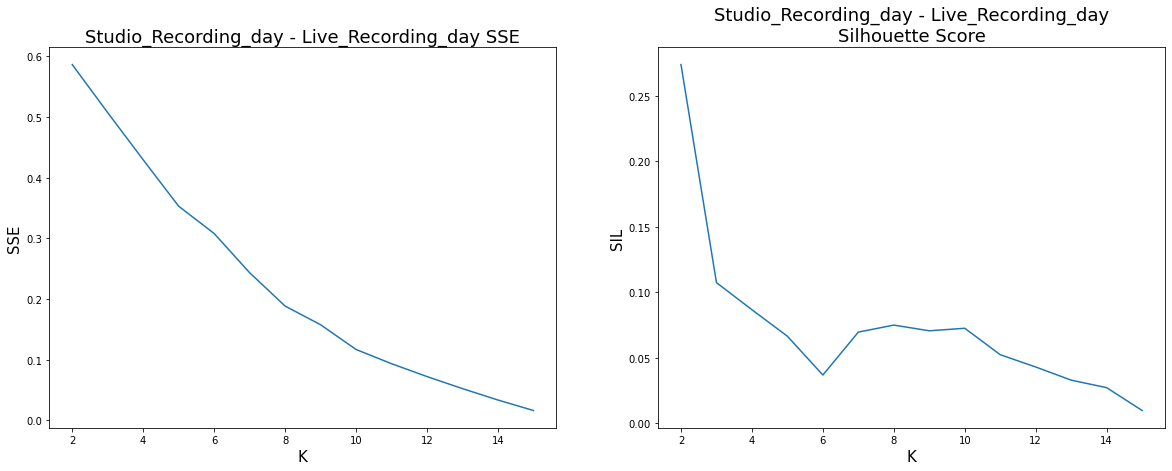

In [215]:
find_optimal_k_kmeans(15, 'dtw', X_paa, False, album_type)

In [216]:
cluster_centers_studio_live_paa_dtw, dict_label_studio_live_paa_dtw, \
labels_studio_live_paa_dtw = run_kmeans(3, 1000, 10, 'dtw', X_paa, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 7, 1: 7, 2: 2}

SSE:  0.5069373084049982
Silhouette Score:  0.10738315920488961


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.004695  0.000000  0.002347  0.000000  0.077465   
2010_studio         0.076733  0.064356  0.056931  0.185644  0.178218   
2011_studio         0.129630  0.600000  0.296296  0.251852  0.329630   
2012_studio         0.126246  0.159468  0.023256  0.023256  0.176080   
2013_studio         0.083562  0.341096  0.021918  0.276712  0.246575   
2014_studio         0.112108  0.165919  0.168161  0.172646  0.170404   
2015_studio         0.126437  0.089080  0.040230  0.051724  0.083333   
2016_studio         0.106818  0.204545  0.334091  0.259091  0.238636   
2009_live           0.500000  0.000000  0.046875  0.000000  0.000000   
2010_live           0.000000  0.015385  0.007692  0.153846  0.015385   
2011_live           0.060976  0.000000  0.000000  0.024390  0.000000   
2012_live           0.000000  0.049383  0.000000  0.000000  0.037037   
2013_live           0.000000  0.177083  0.000000  0.000000  0.062500   
2014_live           0.244186  0.000000  0.000000  0.000000  0.162791   
2015_live           0.000000  0.000000  0.010417  0.052083  0.135417   
2016_live           0.000000  0.000000  0.076923  0.365385  0.000000   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.051643  0.004695  0.002347  0.000000  0.000000  ...   
2010_studio         0.282178  0.633663  0.099010  0.012376  0.084158  ...   
2011_studio         0.085185  0.003704  0.200000  0.218519  0.351852  ...   
2012_studio         0.609635  0.161130  0.142857  0.073090  0.049834  ...   
2013_studio         0.158904  0.116438  0.152055  0.138356  0.047945  ...   
2014_studio         0.136771  0.150224  0.078475  0.040359  0.031390  ...   
2015_studio         0.081897  0.053161  0.025862  0.011494  0.106322  ...   
2016_studio         0.140909  0.336364  0.154545  0.077273  0.147727  ...   
2009_live           0.000000  0.042969  0.042969  0.000000  0.003906  ...   
2010_live           0.053846  0.300000  0.000000  0.092308  0.107692  ...   
2011_live           0.012195  0.341463  0.000000  0.012195  0.243902  ...   
2012_live           0.000000  0.000000  0.000000  0.000000  0.030864  ...   
2013_live           0.000000  0.010417  0.000000  0.000000  0.000000  ...   
2014_live           0.000000  0.000000  0.197674  0.000000  0.000000  ...   
2015_live           0.000000  0.000000  0.145833  0.000000  0.000000  ...   
2016_live           0.153846  0.250000  0.000000  0.000000  0.076923  ...   

                         174       175       176       177       178  \
track_date_created                                                     
2009_studio         0.098592  0.185446  0.086854  0.079812  0.018779   
2010_studio         0.388614  0.163366  0.128713  0.267327  0.292079   
2011_studio         0.018519  0.048148  0.359259  0.077778  0.485185   
2012_studio         0.056478  0.252492  0.131229  0.039867  0.094684   
2013_studio         0.090411  0.184932  0.197260  0.082192  0.034247   
2014_studio         0.195067  0.372197  0.291480  0.174888  0.080717   
2015_studio         0.114943  0.048851  0.097701  0.096264  0.060345   
2016_studio         0.156818  0.268182  0.118182  0.118182  0.229545   
2009_live           0.164062  0.093750  0.015625  0.082031  0.000000   
2010_live           0.053846  0.169231  0.007692  0.000000  0.000000   
2011_live           0.475610  0.048780  0.378049  0.012195  0.000000   
2012_live           0.000000  0.018519  0.000000  0.154321  0.000000   
2013_live           0.000000  0.104167  0.281250  0.000000  0.000000   
2014_live           0.000000  0.046512  0.000000  0.000000  0.000000   
2015_live           0.000000  0.479167  0.000000  0.000000  0.000000   
2016_live           0.192308  0.000000  0.000000  0.461538  0.480769   

                         179       180       1

Cluster 0
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2009_studio', '2010_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2016_studio']

Cluster 2
 ['2011_studio', '2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                0              7            7  -0.0000  1.0000
Cluster 1                7              0            7  -0.0000  1.0000
Cluster 2                1              1            2   1.0000  0.5000
Total                    8              8           16   0.1250  0.9375

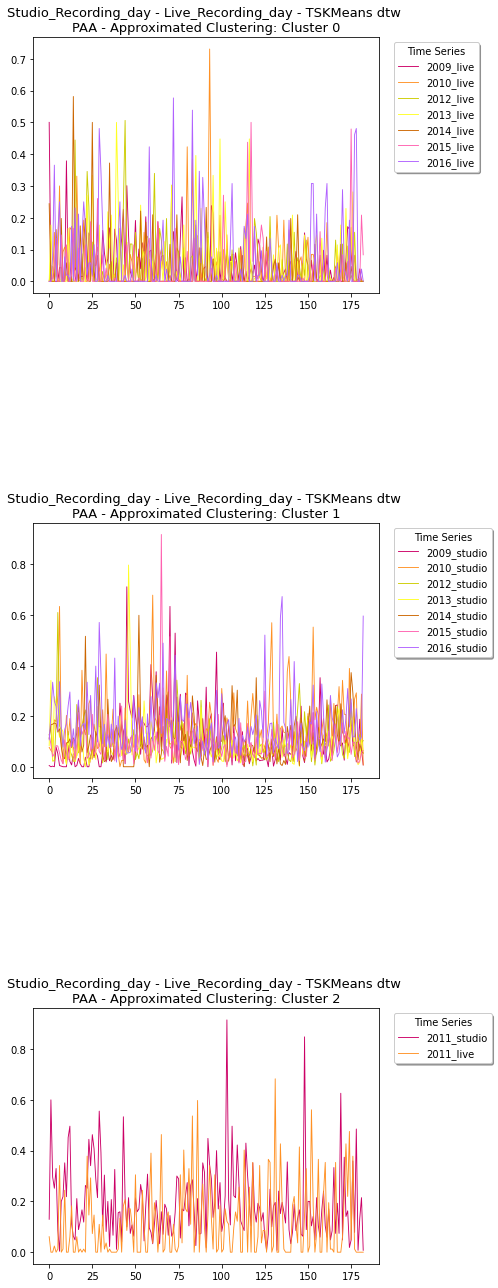

In [217]:
analyze_approximated_clusters(labels_studio_live_paa_dtw, X_paa, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', True)

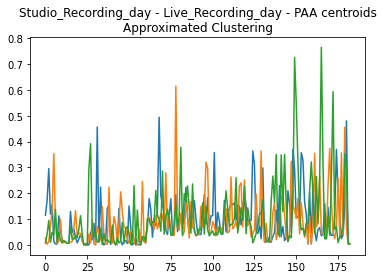

In [218]:
plot_centroids_approximated(cluster_centers_studio_live_paa_dtw, X_paa, album_type, 'PAA')

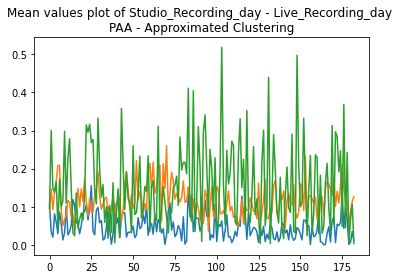

In [219]:
plot_mean_values_approximated(labels_studio_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [220]:
n_sax1d_segments = 183
n_sax_symbols_avg = 50
#n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg)#, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_studio_live_scaled)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  828.6794871794859 Silhouette Score:  0.19169853456132163

k:  3 SSE:  715.7524038461524 Silhouette Score:  0.16746567111881921

k:  4 SSE:  606.3958333333336 Silhouette Score:  0.1680059003929815

k:  5 SSE:  529.5767045454554 Silhouette Score:  0.1054329548618415

k:  6 SSE:  476.8125 Silhouette Score:  0.049805846069815515

k:  7 SSE:  389.2437500000001 Silhouette Score:  0.07198251399840361

k:  8 SSE:  327.17261904761847 Silhouette Score:  0.03736411330470042

k:  9 SSE:  274.72916666666634 Silhouette Score:  0.028636209088120458

k:  10 SSE:  228.51875000000035 Silhouette Score:  0.025163186415144072

k:  11 SSE:  179.5625 Silhouette Score:  0.029446852879302154

k:  12 SSE:  136.63541666666663 Silhouette Score:  0.02208791212418524

k:  13 SSE:  96.66666666666664 Silhouette Score:  0.02270836806856958

k:  14 SSE:  61.54166666666664 Silhouette Score:  0.01316478138102382

k:  15 SSE:  30.40625 Silhouette Score:  0.0011005297055986245



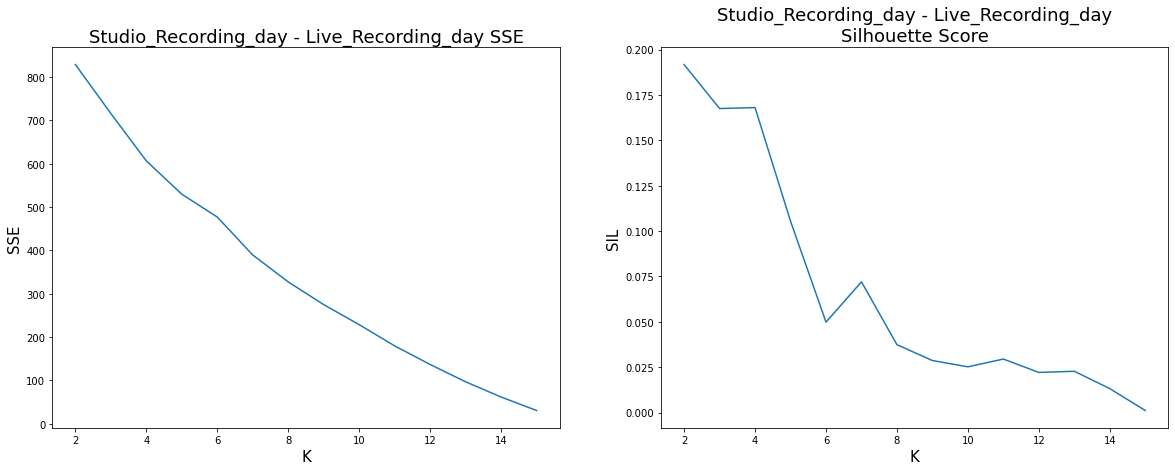

In [221]:
find_optimal_k_kmeans(15, 'euclidean', X_sax1d, False, album_type)

In [222]:
cluster_centers_studio_live_sax1d, dict_label_studio_live_sax1d, \
labels_studio_live_sax1d = run_kmeans(4, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (4, 183, 2)

Labels:  {0: 1, 1: 12, 2: 1, 3: 2}

SSE:  606.3958333333336
Silhouette Score:  0.1680059003929815


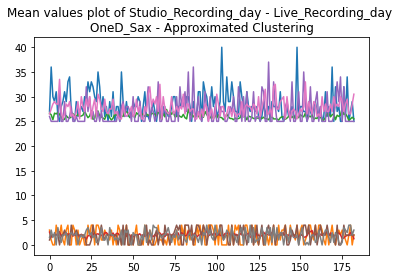

In [223]:
plot_mean_values_approximated(labels_studio_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  425.1286083534749 Silhouette Score:  0.23589256693766053

k:  3 SSE:  361.63922221172663 Silhouette Score:  0.20839183208189477

k:  4 SSE:  306.87102687702907 Silhouette Score:  0.19797586841481954

k:  5 SSE:  267.0071599800028 Silhouette Score:  0.11079281756056779

k:  6 SSE:  228.57140870887423 Silhouette Score:  0.05503422824184581

k:  7 SSE:  188.95908485542412 Silhouette Score:  0.07244083199969395

k:  8 SSE:  155.38740826812256 Silhouette Score:  0.06660243497633918

k:  9 SSE:  130.10031813807677 Silhouette Score:  0.04003675642449718

k:  10 SSE:  103.75895860505238 Silhouette Score:  0.03033623151454274

k:  11 SSE:  83.34140564296813 Silhouette Score:  0.023158274450637773

k:  12 SSE:  59.10600942460318 Silhouette Score:  0.01959799903294604

k:  13 SSE:  42.8094320436508 Silhouette Score:  0.010059107503778633

k:  14 SSE:  24.253608630952378 Silhouette Score:  0.010651751484719332

k:  15 SSE:  11.129910714285712 Silhouette Score:  0.008991770892435916



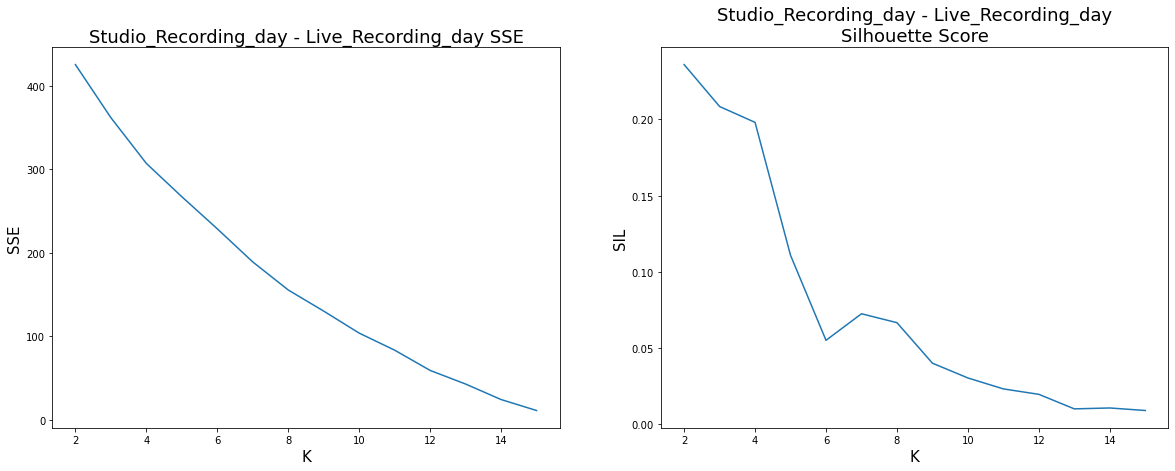

In [224]:
find_optimal_k_kmeans(15, 'dtw', X_sax1d, False, album_type)

In [225]:
cluster_centers_studio_live_sax1d_dtw, dict_label_studio_live_sax1d_dtw, \
labels_studio_live_sax1d_dtw = run_kmeans(3, 1000, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (3, 183, 2)

Labels:  {0: 12, 1: 3, 2: 1}

SSE:  361.63922221172663
Silhouette Score:  0.20839183208189477


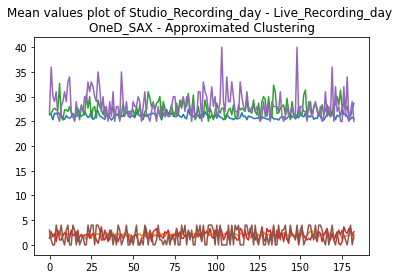

In [226]:
plot_mean_values_approximated(labels_studio_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [227]:
n_sax_segments = 183
n_sax_symbols = 50

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_live_scaled)

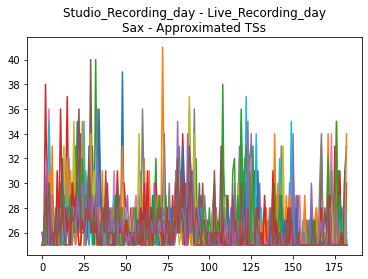

In [228]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>EUCLIDEAN</h3>

k:  2 SSE:  582.0624999999998 Silhouette Score:  0.21676349270259937

k:  3 SSE:  501.69270833333326 Silhouette Score:  0.2042224300326727

k:  4 SSE:  417.82812499999983 Silhouette Score:  0.19537311880436725

k:  5 SSE:  361.661931818182 Silhouette Score:  0.12104223543346601

k:  6 SSE:  314.25669642857133 Silhouette Score:  0.04139147882392301

k:  7 SSE:  261.28645833333326 Silhouette Score:  0.051602348739741316

k:  8 SSE:  211.31770833333326 Silhouette Score:  0.049252129271110646

k:  9 SSE:  178.17708333333326 Silhouette Score:  0.04243590294140823

k:  10 SSE:  146.0625 Silhouette Score:  0.03825028190789487

k:  11 SSE:  115.734375 Silhouette Score:  0.04159478606935725

k:  12 SSE:  86.81250000000003 Silhouette Score:  0.036621343643258975

k:  13 SSE:  61.28125000000003 Silhouette Score:  0.03100386234206602

k:  14 SSE:  39.8125 Silhouette Score:  0.022630845534009642

k:  15 SSE:  19.78125 Silhouette Score:  0.0037823112801971966



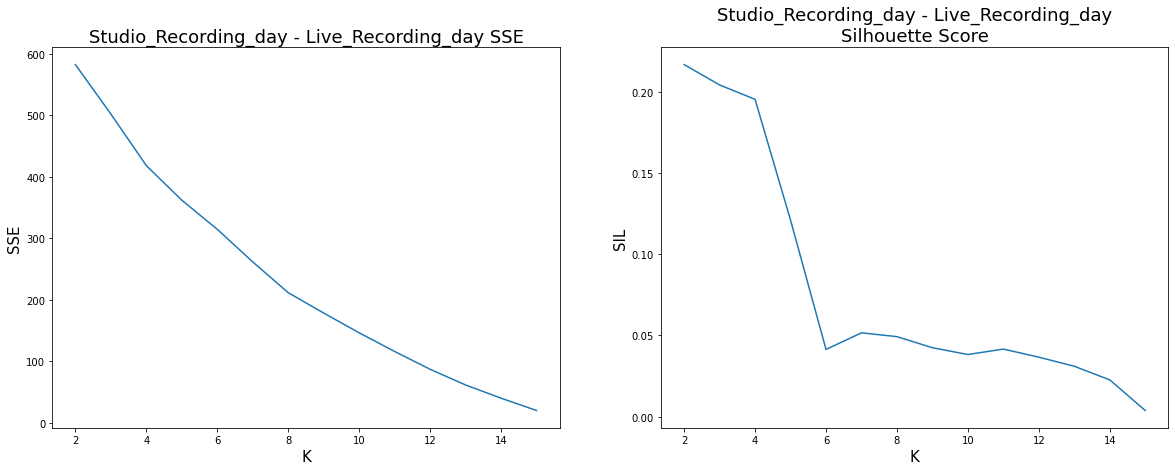

In [229]:
find_optimal_k_kmeans(15, 'euclidean', X_sax, False, album_type)

In [230]:
cluster_centers_studio_live_sax, dict_label_studio_live_sax, \
labels_studio_live_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 12, 1: 3, 2: 1}

SSE:  501.69270833333326
Silhouette Score:  0.2042224300326727


Dataset con le labels associate


0   1   2   3   4   5   6   7   8   9  ...  174  175  \
track_date_created                                          ...             
2009_studio         25  25  25  25  26  26  25  25  25  25  ...   26   28   
2010_studio         26  26  26  28  28  30  36  26  25  26  ...   32   28   
2011_studio         27  36  30  29  31  26  25  28  29  31  ...   25   25   
2012_studio         27  28  25  25  28  36  28  27  26  25  ...   26   29   
2013_studio         26  31  25  30  29  28  27  28  27  25  ...   26   28   
2014_studio         27  28  28  28  28  27  27  26  25  25  ...   28   32   
2015_studio         27  26  25  26  26  26  26  25  25  27  ...   27   25   
2016_studio         27  29  31  30  29  27  31  28  26  27  ...   28   30   
2009_live           34  25  25  25  25  25  25  25  25  25  ...   28   26   
2010_live           25  25  25  28  25  26  30  25  26  27  ...   26   28   
2011_live           26  25  25  25  25  25  31  25  25  29  ...   34   25   
2012_live           25  25  25  25  25  25  25  25  25  25  ...   25   25   
2013_live           25  28  25  25  26  25  25  25  25  25  ...   25   27   
2014_live           29  25  25  25  28  25  25  28  25  25  ...   25   25   
2015_live           25  25  25  26  27  25  25  27  25  25  ...   25   34   
2016_live           25  25  26  32  25  28  29  25  25  26  ...   28   25   

                    176  177  178  179  180  181  182  Labels  
track_date_created                                             
2009_studio          26   26   25   26   28   26   25       0  
2010_studio          27   30   30   26   26   30   25       1  
2011_studio          32   26   34   25   27   29   25       1  
2012_studio          27   25   26   26   27   26   27       0  
2013_studio          28   26   25   25   25   27   26       0  
2014_studio          30   28   26   25   26   26   26       0  
2015_studio          26   26   26   25   25   26   26       0  
2016_studio          27   27   29   27   27   27   36       1  
2009_live            25   26   25   25   25   25   25       0  
2010_live            25   25   25   25   25   25   25       0  
2011_live            32   25   25   25   25   25   25       2  
2012_live            25   28   25   25   25   25   25       0  
2013_live            30   25   25   25   25   25   25       0  
2014_live            25   25   25   25   25   25   25       0  
2015_live            25   25   25   25   25   29   26       0  
2016_live            25   33   34   25   25   25   25       0  

[16 rows x 184 columns]

Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2010_studio', '2011_studio', '2016_studio']

Cluster 2
 ['2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                5              7           12   0.9799  0.5833
Cluster 1                3              0            3  -0.0000  1.0000
Cluster 2                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.7349  0.6875

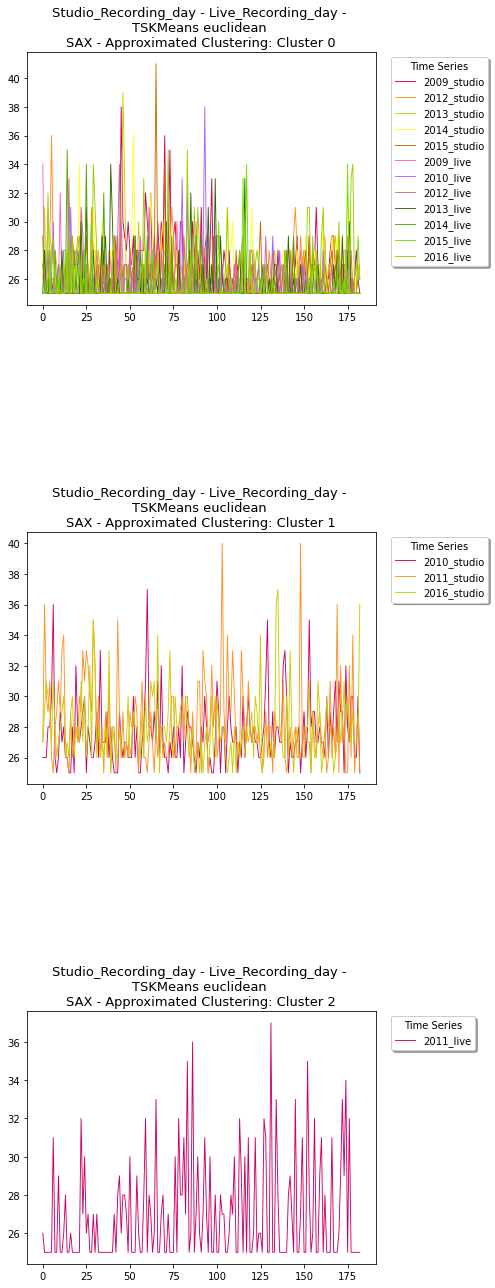

In [231]:
analyze_approximated_clusters(labels_studio_live_sax, X_sax, df_tss_studio_live_scaled, \
                              album_type, \
                              '\nTSKMeans euclidean \nSAX - Approximated Clustering', True)

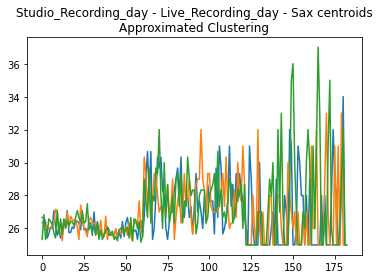

In [232]:
plot_centroids_approximated(cluster_centers_studio_live_sax, X_sax, album_type, 'Sax')

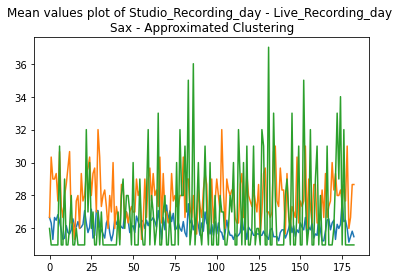

In [233]:
plot_mean_values_approximated(labels_studio_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  184.3907008412248 Silhouette Score:  0.2924388283420913

k:  3 SSE:  158.36309407299302 Silhouette Score:  0.26808389318988673

k:  4 SSE:  134.90409771053666 Silhouette Score:  0.24735910731592342

k:  5 SSE:  113.00049861877434 Silhouette Score:  0.05833650492135654

k:  6 SSE:  98.84418542726752 Silhouette Score:  0.07970415610144035

k:  7 SSE:  78.51900804856578 Silhouette Score:  0.05380196360316752

k:  8 SSE:  62.71492247257164 Silhouette Score:  0.043107005201349434

k:  9 SSE:  49.34591616113356 Silhouette Score:  0.043755449069750894

k:  10 SSE:  37.789265498863 Silhouette Score:  0.05948605596141107

k:  11 SSE:  30.30654761904762 Silhouette Score:  0.060616582557434046

k:  12 SSE:  22.39080425914666 Silhouette Score:  0.04107015481994069

k:  13 SSE:  15.240773809523816 Silhouette Score:  0.03937620465363515

k:  14 SSE:  9.529265873015875 Silhouette Score:  0.026281980702114453

k:  15 SSE:  4.235515873015876 Silhouette Score:  0.018214165060999373



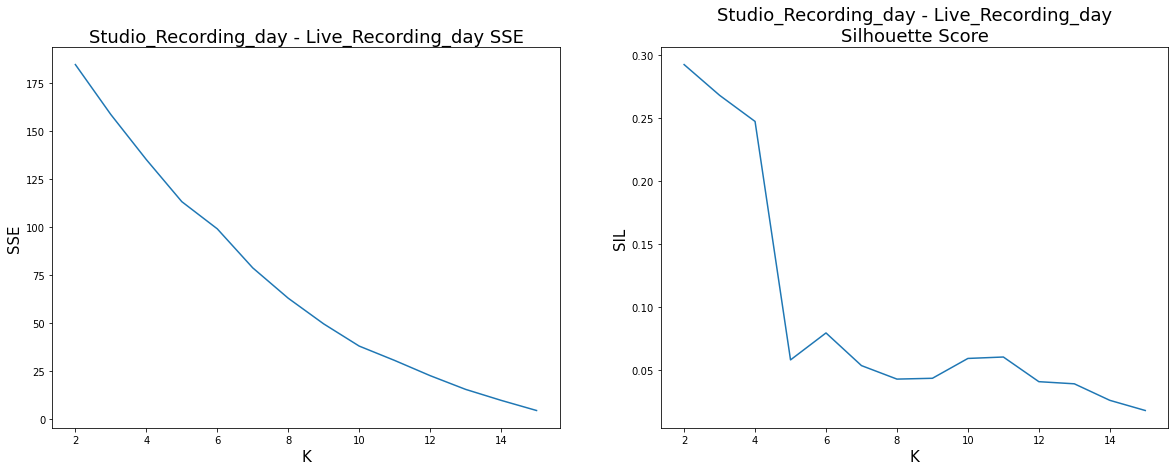

In [234]:
find_optimal_k_kmeans(15, 'dtw', X_sax, False, album_type)

In [235]:
cluster_centers_studio_live_sax_dtw, dict_label_studio_live_sax_dtw, \
labels_studio_live_sax_dtw = run_kmeans(3, 1000, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 183, 1)

Labels:  {0: 12, 1: 3, 2: 1}

SSE:  158.36309407299302
Silhouette Score:  0.26808389318988673


Dataset con le labels associate


0   1   2   3   4   5   6   7   8   9  ...  174  175  \
track_date_created                                          ...             
2009_studio         25  25  25  25  26  26  25  25  25  25  ...   26   28   
2010_studio         26  26  26  28  28  30  36  26  25  26  ...   32   28   
2011_studio         27  36  30  29  31  26  25  28  29  31  ...   25   25   
2012_studio         27  28  25  25  28  36  28  27  26  25  ...   26   29   
2013_studio         26  31  25  30  29  28  27  28  27  25  ...   26   28   
2014_studio         27  28  28  28  28  27  27  26  25  25  ...   28   32   
2015_studio         27  26  25  26  26  26  26  25  25  27  ...   27   25   
2016_studio         27  29  31  30  29  27  31  28  26  27  ...   28   30   
2009_live           34  25  25  25  25  25  25  25  25  25  ...   28   26   
2010_live           25  25  25  28  25  26  30  25  26  27  ...   26   28   
2011_live           26  25  25  25  25  25  31  25  25  29  ...   34   25   
2012_live           25  25  25  25  25  25  25  25  25  25  ...   25   25   
2013_live           25  28  25  25  26  25  25  25  25  25  ...   25   27   
2014_live           29  25  25  25  28  25  25  28  25  25  ...   25   25   
2015_live           25  25  25  26  27  25  25  27  25  25  ...   25   34   
2016_live           25  25  26  32  25  28  29  25  25  26  ...   28   25   

                    176  177  178  179  180  181  182  Labels  
track_date_created                                             
2009_studio          26   26   25   26   28   26   25       0  
2010_studio          27   30   30   26   26   30   25       1  
2011_studio          32   26   34   25   27   29   25       1  
2012_studio          27   25   26   26   27   26   27       0  
2013_studio          28   26   25   25   25   27   26       0  
2014_studio          30   28   26   25   26   26   26       0  
2015_studio          26   26   26   25   25   26   26       0  
2016_studio          27   27   29   27   27   27   36       2  
2009_live            25   26   25   25   25   25   25       0  
2010_live            25   25   25   25   25   25   25       0  
2011_live            32   25   25   25   25   25   25       1  
2012_live            25   28   25   25   25   25   25       0  
2013_live            30   25   25   25   25   25   25       0  
2014_live            25   25   25   25   25   25   25       0  
2015_live            25   25   25   25   25   29   26       0  
2016_live            25   33   34   25   25   25   25       0  

[16 rows x 184 columns]

Cluster 0
 ['2009_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2010_studio', '2011_studio', '2011_live']

Cluster 2
 ['2016_studio']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                5              7           12   0.9799  0.5833
Cluster 1                2              1            3   0.9183  0.6667
Cluster 2                1              0            1  -0.0000  1.0000
Total                    8              8           16   0.9071  0.6250

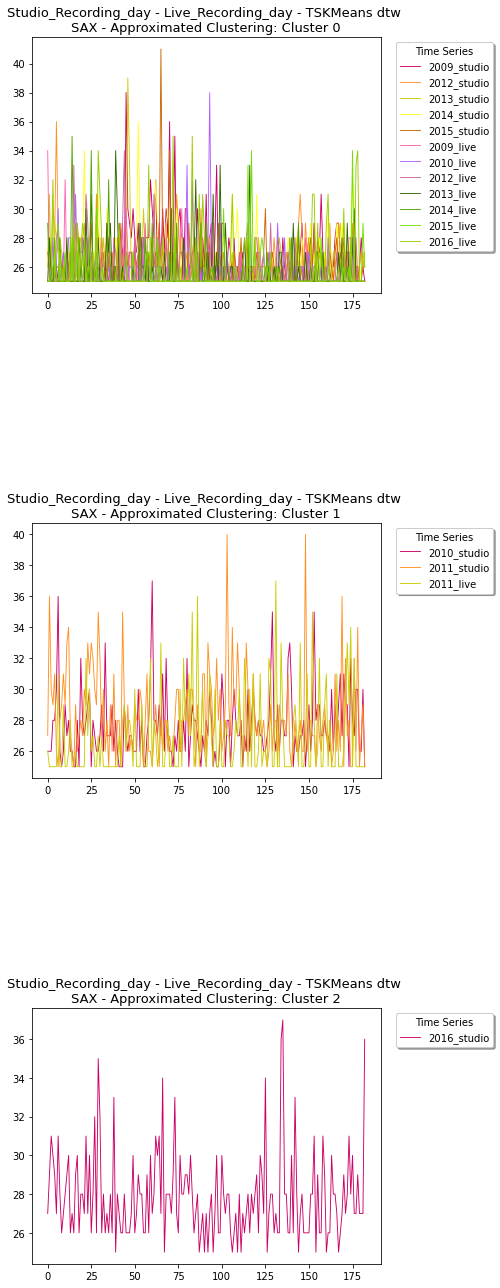

In [237]:
analyze_approximated_clusters(labels_studio_live_sax_dtw, X_sax, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', True)

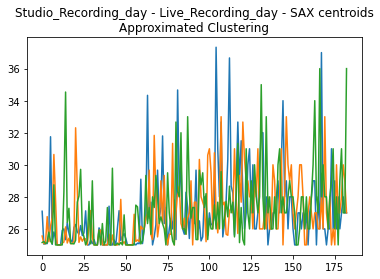

In [238]:
plot_centroids_approximated(cluster_centers_studio_live_sax_dtw, X_sax, album_type, 'SAX')

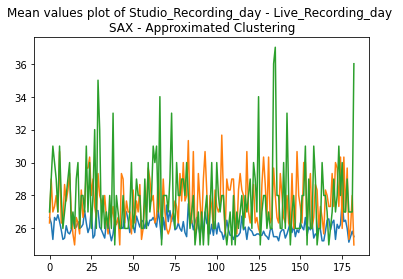

In [239]:
plot_mean_values_approximated(labels_studio_live_sax_dtw, X_sax, album_type, 'SAX')